In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition.pca import PCA

%matplotlib inline  

seed = 123
np.random.seed(seed)  # for reproducibility
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [195]:
def converte_periodo_cod(cod_inicio,cod_fim):
    def converte_periodo(ano_inicial,semestre_inicial,ano_final,semestre_final):
        anos = ano_final-ano_inicial    
        return 2*anos + semestre_final-semestre_inicial
        
    ano_inicial      = int(str(cod_inicio)[0:4])
    ano_final        = int(str(cod_fim)[0:4])
    semestre_inicial = int(str(cod_inicio)[4:])
    semestre_final   = int(str(cod_fim)[4:])
    
    periodos_totais = converte_periodo(ano_inicial,semestre_inicial,ano_final,semestre_final)
    
    print(ano_inicial,ano_final,semestre_inicial,semestre_final,periodos_totais)
    return periodos_totais

In [196]:
def create_aluno_array(id_aluno,max_periodos = 8):

    aluno = {}

    aluno_df = df[df.aluno == id_aluno]

    aluno_concluiu = aluno_df.concluiu.values[0]
    aluno_ano_inicio = np.min(aluno_df.periodo.values)
    aluno_periodo = [converte_periodo_cod(aluno_ano_inicio,p)   for p in aluno_df.periodo.values]

    aluno_periodo = np.array(aluno_periodo)
    aluno_disciplinas = aluno_df.disciplina.values
    aluno_notas = aluno_df.nota.values

    aluno['aluno_concluiu'] = aluno_concluiu

    print(aluno_concluiu)
    print(aluno_disciplinas)
    print(aluno_notas)
    print(aluno_periodo)

    aluno_dict = {}
    for i in range(max_periodos):
        ids = np.where(aluno_periodo == i)[0]
        print(ids)
        aluno_dict[i] = [[aluno_disciplinas[ii], aluno_notas[ii]] for ii in ids]

    print(aluno_dict)
    aluno['periodos'] = aluno_dict
    
    
    def create_aluno_matrix(aluno_dict, disciplinas, disciplinas_dict, max_periodos=8):
        aluno_matrix = np.zeros((max_periodos, len(disciplinas))) - 1
        for per in range(max_periodos):
            for it in aluno_dict['periodos'][per]:
                aluno_matrix[per, disciplinas_dict[it[0]]] = it[1]  # matrix recebe nota na posicao correta
    
        return aluno_matrix

    aluno_matrix = create_aluno_matrix(aluno, disciplinas, disciplinas_dict, max_periodos=8)
    aluno['matrix'] = aluno_matrix
    
    return aluno

In [197]:
#xl = pd.ExcelFile("data.xlsx")
#df = xl.parse(xl.sheet_names[0])
#df.head(10)

df = pd.read_excel("data.xlsx")
df.head(10)

,aluno,curso,disciplina,nota,periodo,concluiu
0,153613,MATEMÁTICA,GMA04084,97,20072,0
1,154208,MATEMÁTICA,SSE03068,97,20082,0
2,154537,MATEMÁTICA,TCC03063,97,20052,0
3,154793,MATEMÁTICA,GGM04082,97,20052,0
4,154793,MATEMÁTICA,SSE02052,97,20081,0
5,159905,MATEMÁTICA,GMA00114,97,20092,0
6,160569,MATEMÁTICA,TCC03063,97,20071,0
7,162752,MATEMÁTICA,SFP00087,97,20091,0
8,163854,MATEMÁTICA,TCC03063,97,20091,0
9,166571,MATEMÁTICA,GAN04096,97,20081,0


In [198]:
X = df.iloc[:, :5]
Y = df.iloc[:, 5]

print(X.shape)
print(Y.shape)

(20482, 5)
(20482,)


In [199]:
#%%
disciplinas = np.unique(df.disciplina)

disciplinas_dict = {}
for i,it in enumerate(disciplinas):
    disciplinas_dict[i]=it
    disciplinas_dict[it]=i

print(disciplinas.size)
disciplinas

297


array(['CED00001', 'GAG00028', 'GAG04021', 'GAN00008', 'GAN00144',
       'GAN00145', 'GAN00146', 'GAN00147', 'GAN00148', 'GAN00152',
       'GAN00153', 'GAN00154', 'GAN00155', 'GAN00156', 'GAN00157',
       'GAN00159', 'GAN00160', 'GAN00161', 'GAN00162', 'GAN00163',
       'GAN00164', 'GAN00165', 'GAN00167', 'GAN00168', 'GAN00169',
       'GAN00172', 'GAN00173', 'GAN00175', 'GAN00176', 'GAN04061',
       'GAN04071', 'GAN04072', 'GAN04096', 'GAN04123', 'GAN04124',
       'GAN04125', 'GAN04126', 'GAN04127', 'GAN04129', 'GAN04130',
       'GAN04134', 'GAN06094', 'GAN06118', 'GAN06122', 'GAN06128',
       'GAT00130', 'GAT02012', 'GAT03017', 'GAT03033', 'GAT04011',
       'GAT04016', 'GAT04036', 'GAT04056', 'GAT04093', 'GCO00414',
       'GEF00019', 'GEF00020', 'GEF00022', 'GEF00024', 'GEF00025',
       'GEF00026', 'GEF00027', 'GEF00028', 'GEF00029', 'GEF00030',
       'GEF00099', 'GEF00100', 'GEF00101', 'GEF01004', 'GEF01007',
       'GEF01009', 'GEF01013', 'GEF01014', 'GEF01015', 'GEF010

In [200]:
#dict = { 0:1, 1:2, 10:3, 11:4, 20:5, 21:6, 30:7, 31:8, 40:9, 41:10, }
aluno_map_dict = {  }
c = 0
for p in range(0,300,10):
    aluno_map_dict[p] = c
    aluno_map_dict[p+1] = c+1
    c += 2
    
#%%
print(aluno_map_dict)

{0: 0, 1: 1, 10: 2, 11: 3, 20: 4, 21: 5, 30: 6, 31: 7, 40: 8, 41: 9, 50: 10, 51: 11, 60: 12, 61: 13, 70: 14, 71: 15, 80: 16, 81: 17, 90: 18, 91: 19, 100: 20, 101: 21, 110: 22, 111: 23, 120: 24, 121: 25, 130: 26, 131: 27, 140: 28, 141: 29, 150: 30, 151: 31, 160: 32, 161: 33, 170: 34, 171: 35, 180: 36, 181: 37, 190: 38, 191: 39, 200: 40, 201: 41, 210: 42, 211: 43, 220: 44, 221: 45, 230: 46, 231: 47, 240: 48, 241: 49, 250: 50, 251: 51, 260: 52, 261: 53, 270: 54, 271: 55, 280: 56, 281: 57, 290: 58, 291: 59}


In [201]:
alunos = np.unique(df.aluno)
len(alunos)

X = []
Y = []

for aluno in alunos:
    aluno_dict = create_aluno_array(aluno)
    X.append(aluno_dict['matrix'].ravel())    
    Y.append(aluno_dict['aluno_concluiu'])

X = np.array(X)
Y = np.array(Y)

2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2006 1 2 3
2005 2005 1 1 0
2005 2006 1 1 2
2005 2006 1 1 2
2005 2006 1 2 3
2005 2007 1 2 5
2005 2007 1 2 5
0
['GMA06076' 'GGM04080' 'GMA04075' 'GGT02001' 'GGM04081' 'GGT02001'
 'GMA04075' 'GGM04080' 'GGM04081' 'GAN04071' 'GMA06076' 'GAN04071'
 'GGM04082' 'GGM04082' 'GGM04082' 'GAN04071']
[68 65 64 64 60 43 43 40 27 12 10  0  0  0  0  0]
[1 1 1 1 1 0 0 0 0 3 0 2 2 3 5 5]
[ 5  6  7  8 10]
[0 1 2 3 4]
[11 12]
[ 9 13]
[]
[14 15]
[]
[]
{0: [['GGT02001', 43], ['GMA04075', 43], ['GGM04080', 40], ['GGM04081', 27], ['GMA06076', 10]], 1: [['GMA06076', 68], ['GGM04080', 65], ['GMA04075', 64], ['GGT02001', 64], ['GGM04081', 60]], 2: [['GAN04071', 0], ['GGM04082', 0]], 3: [['GAN04071', 12], ['GGM04082', 0]], 4: [], 5: [['GGM04082', 0], ['GAN04071', 0]], 6: [], 7: []}
2005 2007 1 1 4
2005 2005 1 2 1
2005 2006 1 2 3
2005 2005 1 1 0
2005 2005 1 1 0
2005 2

2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 2 1
2005 2005 1 2 1
2005 2006 1 1 2
2005 2006 1 1 2
2005 2006 1 1 2
2005 2006 1 1 2
2005 2006 1 1 2
2005 2006 1 2 3
2005 2006 1 2 3
2005 2006 1 2 3
2005 2006 1 2 3
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 1 4
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2007 1 2 5
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 1 6
2005 2008 1 2 7
2005 2008 1 2 7
2005 2008 1 2 7
2005 2008 1 2 7
2005 2008 1 2 7
1
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'TCC03063' 'GMA06076'
 'TCC03063' 'GGM04081' 'GGT02001' 'GMA04075' 'SFP04013' 'GAN04071'
 'GGM04082' 'GMA06077' 'SSE00229' 'GAN04096' 'GGM04088' 'GAN04072'
 'GMA06078' 'GAN06094' 'GMA04079' 'TCC03059' 'GFI06108' 'GGT02003'
 'SSE00228' 'SSE04036' 'GAN06122' 'GGM06087' 'GAN04134' 'GAN04123'
 'GFI00159' 'GFI00162' 'GGM04074' 'GGM04089' 'SSE02052' 'GMA00119'
 'SSE03068' 'GMA00114' 'SSE02207' 'GFI00159']
[ 72  

['GGM04080' 'GGM04081' 'GMA06076' 'GMA04075' 'GGT02001' 'GMA06076'
 'GGM04081']
[77 61 60 44 44 36  3]
[0 1 1 0 0 0 0]
[0 3 4 5 6]
[1 2]
[]
[]
[]
[]
[]
[]
{0: [['GGM04080', 77], ['GMA04075', 44], ['GGT02001', 44], ['GMA06076', 36], ['GGM04081', 3]], 1: [['GGM04081', 61], ['GMA06076', 60]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2005 2005 1 1 0
2005 2005 1 2 1
2005 2005 1 2 1
0
['GMA06077' 'GMA06077' 'GAN04072']
[26 17  0]
[0 1 1]
[0]
[1 2]
[]
[]
[]
[]
[]
[]
{0: [['GMA06077', 26]], 1: [['GMA06077', 17], ['GAN04072', 0]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
2005 2005 1 1 0
0
['GMA06076' 'GGM04080' 'GGT02001' 'GMA04075' 'GGM04081']
[40 20 11 11  0]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['GMA06076', 40], ['GGM04080', 20], ['GGT02001', 11], ['GMA04075', 11], ['GGM04081', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2005 2006 1 2 3
2005 2009 1 2 9
2005 2011 1 2 13
2005 2008 1 2 7
2005 2010 1 1 10
20

2005 2009 1 1 8
2005 2009 1 2 9
2005 2009 1 2 9
1
['GGT02001' 'GMA04075' 'GMA06076' 'GGM04080' 'GGM04081' 'GMA04075'
 'TCC03063' 'GGM04082' 'GGT02001' 'GAN04071' 'GAN04096' 'SSE00228'
 'GMA06077' 'SSE00229' 'GMA06078' 'GAN04072' 'GFI06109' 'SSE04036'
 'TCC03059' 'GAN06094' 'GGM06087' 'GGT02002' 'GMA04079' 'SFP04013'
 'GAN06122' 'GAN04123' 'GGT06007' 'GGM06076' 'GAN04125' 'GMA04080'
 'GGM04089' 'SSE00228' 'GAN04127' 'GAN04134' 'GGM00164' 'GAN04126'
 'GGM04088' 'GAN00154' 'SSE02052' 'GMA00119' 'GET00060' 'GAN00154'
 'GAN00157' 'GGM04074' 'SSE00233' 'SSE00232' 'GAN00154' 'GGM06076']
[ 54  54  63  86  55  68  97  69  68  90  84  85  87 100  40  72  67  80
  62  72  70 100  66 100  68  68  68  38  36  60  60  85  90  95  60  60
  78  44  78  88  64  30  20 100  60  75  60  12]
[0 0 0 0 0 1 1 1 1 2 2 2 2 2 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 5 6 6 6 6 6 7 7
 7 7 7 8 8 8 8 8 8 9 9]
[0 1 2 3 4]
[5 6 7 8]
[ 9 10 11 12 13]
[14 15 16]
[17 18 19 20 21 22]
[23 24 25 26 27 28 29]
[30 31 32 33 34]
[35 36 3

2005 2011 2 1 11
2005 2011 2 2 12
0
['SGE00011' 'GAN00147' 'GGM04080' 'GAN04071' 'SGE00026' 'SEN00076'
 'SEN00067' 'GHT00313' 'SEN00068' 'GAN00146' 'GGT02001' 'GMA04075'
 'GGM04081' 'SGE00026' 'GMA00110' 'GGM04082' 'SEN00076' 'GGM04081'
 'GMA06076' 'GMA00109' 'GGT02001' 'GMA04075' 'GMA00109' 'GFI06108'
 'SSE00229' 'GET00117' 'GGT02001' 'GMA04075' 'GMA06076' 'GAN04071'
 'GGM04080' 'GAN04071' 'GEF01014' 'GAN04072' 'GMA00110' 'GAN00155'
 'SSE00228' 'GGM00167' 'TCC03063' 'GET00121' 'GAN00152' 'SEN00178'
 'GAN00152' 'GMA00119']
[76 73 69 68 68 68 67 66 63 63 60 60 60 59 50 47 44 40 40 40 29 29 22 20 20
 19 10 10  9  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 8 10  1  6 10 10  8  8  9  9  2  2  2  8  5  4  8  1  2  6  1  1  5  4 10
 10  0  0  1  5  0  4  6  7  7  7  8  8  9  9 10 11 11 12]
[26 27 30]
[ 2 17 20 21 28]
[10 11 12 18]
[]
[15 23 31]
[14 22 29]
[ 3 19 32]
[33 34 35]
{0: [['GGT02001', 10], ['GMA04075', 10], ['GGM04080', 0]], 1: [['GGM04080', 69], ['GGM04081', 40], ['GGT02001', 

2005 2007 1 1 4
2005 2007 1 2 5
0
['GGT02001' 'GMA04075' 'GGM04082' 'GMA06076' 'GAN04071' 'GMA06077'
 'GGM04080' 'GGM04081' 'GAN04096' 'GGT02001' 'GMA04075' 'GGM04080'
 'GMA06077' 'GMA06076' 'GGM04081' 'GMA06077' 'TCC03063' 'GAN04071'
 'GMA06078']
[73 73 72 66 56 53 42 40 40 34 34 30 22  3  0  0  0  0  0]
[1 1 2 1 2 4 1 1 5 0 0 0 2 0 0 3 3 4 5]
[ 9 10 11 13 14]
[0 1 3 6 7]
[ 2  4 12]
[15 16]
[ 5 17]
[ 8 18]
[]
[]
{0: [['GGT02001', 34], ['GMA04075', 34], ['GGM04080', 30], ['GMA06076', 3], ['GGM04081', 0]], 1: [['GGT02001', 73], ['GMA04075', 73], ['GMA06076', 66], ['GGM04080', 42], ['GGM04081', 40]], 2: [['GGM04082', 72], ['GAN04071', 56], ['GMA06077', 22]], 3: [['GMA06077', 0], ['TCC03063', 0]], 4: [['GMA06077', 53], ['GAN04071', 0]], 5: [['GAN04096', 40], ['GMA06078', 0]], 6: [], 7: []}
2005 2005 1 2 1
2005 2005 1 1 0
2005 2005 1 2 1
2005 2005 1 2 1
2005 2006 1 1 2
2005 2006 1 1 2
2005 2007 1 1 4
0
['GGM06087' 'GAN04125' 'GAN04134' 'SFP04013' 'GGM04074' 'GMA06082'
 'GGM06087']
[35  2  

2005 2010 1 1 10
2005 2010 1 1 10
1
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'TCC03063'
 'GAN04096' 'GGM04081' 'GMA06077' 'GAN04096' 'GGM04082' 'GAN04071'
 'GFI06108' 'GMA06078' 'GAN04072' 'SSE00229' 'SFP04013' 'GAN04072'
 'GMA06078' 'GAN06094' 'GAN04134' 'GMA04079' 'GGM04074' 'GAN06122'
 'GMA00119' 'GGM00164' 'GGM06087' 'GAN00153' 'SSE04036' 'SSE04145'
 'GGM04088' 'SSE00228' 'GAN00153' 'SSE00231' 'GFI00162' 'TCC03059'
 'GGM04089' 'SSE00232' 'GAN00153' 'GFI00159' 'SSE00233' 'GGT02003']
[ 72  14  66  66  66  62  37  75  71  66  60  60  63   3  56  85  90  63
  50  60  90  46  54  75  87  80  69  30  90  90 100  85  45  75  72  70
  60  95  65  74  95  90]
[ 0  0  0  0  0  1  1  1  1  2  2  2  3  3  3  4  4  4  4  5  5  5  5  6  6
  6  6  7  7  7  7  8  8  8  8  8  9  9  9 10 10 10]
[0 1 2 3 4]
[5 6 7 8]
[ 9 10 11]
[12 13 14]
[15 16 17 18]
[19 20 21 22]
[23 24 25 26]
[27 28 29 30]
{0: [['GGM04080', 72], ['GGM04081', 14], ['GGT02001', 66], ['GMA04075', 66], ['GMA06076', 66]

2005 2010 2 1 9
2005 2010 2 1 9
2005 2010 2 1 9
2005 2010 2 2 10
2005 2010 2 2 10
2005 2011 2 1 11
2005 2011 2 1 11
1
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'TCC03063' 'GGM04082'
 'GMA06076' 'GAN04071' 'GAN04072' 'GAN04096' 'GFI06108' 'GMA06077'
 'SFP04013' 'GAN04072' 'GMA06077' 'GAN06094' 'GMA06078' 'GFI06108'
 'SSE00229' 'GGM04088' 'GMA06078' 'GGM00164' 'GGM04086' 'GGM06087'
 'GMA00119' 'SFP00087' 'TCC03063' 'GGM00167' 'GET04007' 'GMA06078'
 'SSE00228' 'GAN00152' 'SSE00230' 'GFI00162' 'GMA04079' 'SSE00231'
 'GAN00152' 'TCC03059' 'GGM00167' 'GAN04134' 'GFI00159' 'GFI00159'
 'GAN00152' 'GGM04089' 'SSE00232' 'GGM04074' 'SSE00233' 'GAN00152'
 'GFI00159' 'GAN00153']
[ 61  40  61  61  20  60  44  60  56  56  50  54  52  63  73  64   0  60
 100  65  53  90  60   5  90  96  53  38  68  72  75   5  90  67  60  68
   5  53  50  90  10   0  20  92  80  66  95  70  69  60]
[ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  4  4  4  4  5  5  5  5  5
  6  6  6  6  6  7  7  7  7  7  8  8  8  8

2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 2 4
2006 2008 2 2 4
2006 2008 2 2 4
2006 2008 2 2 4
2006 2008 2 2 4
2006 2008 2 2 4
2006 2009 2 1 5
2006 2009 2 1 5
2006 2009 2 1 5
2006 2009 2 1 5
2006 2009 2 1 5
2006 2009 2 1 5
2006 2009 2 2 6
2006 2009 2 2 6
2006 2009 2 2 6
2006 2009 2 2 6
2006 2009 2 2 6
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 2 8
2006 2010 2 2 8
2006 2010 2 2 8
1
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04080'
 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04082' 'GAN04071'
 'GMA06076' 'TCC03063' 'GAN04072' 'GAN04096' 'GGT02002' 'GMA00109'
 'GMA00110' 'GAN00156' 'GGM04088' 'SFP00087' 'SSE00229' 'GMA00111'
 'TCC03059' 'GFI00158' 'GMA00112' 'GET00121' 'GMA00114' 'SSE00230'
 'GFI00161' 'GFI00158' 'GMA00119' 'SSE00228' 'SSE00231' 'GAN00152'
 'GAN00153' 'GGM00167' 'GAN04134' 'GGM04074' 'GGM04089' 'SSE00232'
 'GFI00159' 'GFI00162' 'SSE00233'

2006 2012 1 2 13
1
['GMA06076' 'GGM04080' 'GGM04081' 'GMA04075' 'GGT02001' 'GAN04096'
 'GGM04082' 'GMA06077' 'GAN04071' 'TCC03063' 'GAN04071' 'GAN04096'
 'GMA06077' 'TCC03063' 'GAN04072' 'GAN04096' 'TCC03059' 'GMA06078'
 'GFI06108' 'GFI00162' 'GGM04074' 'SFP00087' 'GAN04072' 'GAN06094'
 'GFI00159' 'GAN06122' 'GGM04074' 'GAN00156' 'GAN00152' 'GGM00167'
 'GMA04079' 'SSE00229' 'GGM00167' 'GAN00152' 'GAN04134' 'GMA00119'
 'SSE00229' 'GAN00153' 'GET00121' 'GGM04088' 'GAN04129' 'GAN04134'
 'GGM04089' 'GAN04126' 'GMA00119' 'SSE00230' 'GAN00157' 'GFI00159'
 'GFI00162' 'GAN04126' 'GAN00168' 'GAN04134' 'SSE00230' 'GMA00114'
 'SSE00228' 'SSE00231' 'GGM00164' 'GFI00162' 'GGT02002' 'GGM00170'
 'GAN00157' 'GMA04080' 'SSE00232' 'GAN00169' 'GMA00125' 'SSE00233'
 'SFP04023' 'GAN00169' 'GAN00168' 'GGM00176' 'GMA00125']
[ 43  79  75  88  88   0  99  46  30  32  50   0  85  80  25  78  63  60
  60  18   0  76 100   0   5   0  81  81   0  21  93  10  85  85   5  22
  75  70  84 100  80  10  85   0  60  40 

2006 2007 1 2 3
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
2006 2009 1 1 6
2006 2009 1 1 6
2006 2009 1 1 6
2006 2009 1 1 6
2006 2009 1 1 6
2006 2009 1 2 7
2006 2009 1 2 7
2006 2009 1 2 7
2006 2009 1 2 7
2006 2010 1 1 8
2006 2010 1 1 8
1
['GGM04081' 'GGM04080' 'GGT02001' 'GMA04075' 'GMA06076' 'GAN04071'
 'TCC03063' 'GGM04082' 'GMA06076' 'GAN04072' 'GAN04096' 'GMA06077'
 'GFI06108' 'TCC03059' 'GGM04088' 'SSE00229' 'GMA06078' 'GAN06122'
 'GAN06094' 'GET04007' 'GGM00164' 'SSE04036' 'GFI00159' 'GGT02004'
 'GFI00162' 'GAN00153' 'SSE00228' 'GMA00114' 'GMA00119' 'GMA06071'
 'GFI00159' 'SFP00087' 'SSE00231' 'GGM04089' 'GGM00167' 'GAN04134'
 'SSE00232' 'SSE00233']
[ 67  65  49  49  19  64  62  80  76  85  69  65  75  75  78 100  73  65
  87  78  90  93  34  90  79  43  93  80 100  79  62  77  78  85  96  90
 100  80]
[0 0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 4 5 5 5 5 5 6 6 6 6 6

2006 2011 1 1 10
2006 2008 1 1 4
2006 2011 1 1 10
2006 2009 1 1 6
2006 2006 1 2 1
2006 2009 1 1 6
2006 2011 1 2 11
2006 2011 1 1 10
2006 2009 1 1 6
2006 2010 1 1 8
2006 2010 1 1 8
2006 2010 1 1 8
2006 2010 1 1 8
2006 2011 1 2 11
2006 2012 1 1 12
2006 2012 1 1 12
0
['GGM04081' 'GMA00112' 'GAN04071' 'GAN00152' 'GAN04072' 'GGM04088'
 'GGM04080' 'GAN04096' 'GMA06077' 'GMA06078' 'GMA06076' 'GGM04082'
 'GAN04134' 'GGT02001' 'GMA04075' 'GET04007' 'GMA00114' 'GAN06094'
 'GFI00161' 'TCC03059' 'GAN04071' 'GMA04079' 'GAN04129' 'GFI00158'
 'GFI00161' 'GFI00158' 'GFI00161' 'GMA00112' 'GAN00152' 'GMA00102'
 'GFI00162' 'SEN00138']
[96 90 89 85 84 84 83 83 80 80 76 76 75 72 72 71 70 65 63 60 54 30 24 17  0
  0  0  0  0  0  0  0]
[ 1 10  2 11  3  6  0  3  1  4  0  2 11  0  0  4 10  4 10  6  1  6 11 10  6
  8  8  8  8 11 12 12]
[ 6 10 13 14]
[ 0  8 20]
[ 2 11]
[4 7]
[ 9 15 17]
[]
[ 5 19 21 24]
[]
{0: [['GGM04080', 83], ['GMA06076', 76], ['GGT02001', 72], ['GMA04075', 72]], 1: [['GGM04081', 96], ['GMA060

[22 23 24 25 26]
{0: [['GMA04075', 75], ['GGM04080', 64], ['GMA06076', 5], ['GGM04081', 0]], 1: [['GAN04096', 40], ['GMA06076', 18], ['GGM04081', 4]], 2: [['SSE00229', 50], ['GGM04081', 40], ['GMA06076', 9]], 3: [['TCC03063', 84], ['GGM04081', 62], ['SEN00067', 60], ['SEN00076', 10]], 4: [['GGM00163', 60], ['GMA00108', 50], ['GAN04071', 15]], 5: [['GGM04088', 74], ['GMA00114', 70], ['GMA00109', 0]], 6: [['GAN00155', 0], ['GGM00164', 0]], 7: [['SSE00228', 0], ['GAN00156', 0], ['GAN04071', 0], ['GMA00110', 0], ['GAN00155', 0]]}
2006 2006 1 1 0
2006 2006 1 1 0
2006 2006 1 1 0
2006 2006 1 2 1
2006 2006 1 2 1
2006 2007 1 1 2
2006 2007 1 1 2
2006 2007 1 1 2
2006 2007 1 2 3
2006 2007 1 2 3
2006 2007 1 2 3
2006 2007 1 2 3
2006 2007 1 2 3
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
2006 2008 1 2 5
1
['GGM04082' 'GET04007' 'GAN04072' 'TCC03059' 'GAN04096' 'GAN06122'
 'GMA06078' 'GAN06094' 'GGT02002' 'GGT06007' 'G

2006 2011 2 1 9
2006 2011 2 1 9
2006 2011 2 1 9
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 2 10
1
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04082'
 'TCC03063' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04088' 'GMA06077'
 'GAN04071' 'GFI06108' 'GMA00109' 'GAN04071' 'GAN04096' 'GGM06087'
 'GMA00110' 'GET04007' 'GGM00167' 'GAN04072' 'GAN00152' 'GFI00159'
 'GMA00119' 'GFI00162' 'GMA00111' 'GAN00156' 'GMA00112' 'GAN00152'
 'SFP00087' 'TCC03059' 'GFI00159' 'GAN00153' 'SSE00229' 'GMA00118'
 'GGM04089' 'SSE00230' 'GGM00164' 'SSE00231' 'GFI00159' 'SSE00225'
 'SSE00228' 'GGM00170' 'GGT02002' 'SSE00233' 'GAN04134' 'CED00001'
 'GMA00120' 'GGM04074' 'SSE00232' 'GMA00114']
[ 75  85  31  31  40  67  90  86  86  53 100  23  24  66  88  69  61  17
  67  65  85  62  29  31  60  65  67  83  76  45  63  65  38  40  87 100
  85  82  85 100  56 100  60  78  80  85  85  81  82  60  90  85]
[ 0  0  0  0  0  1  1  1  1  1  2  2 

2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 2 2
2006 2007 2 2 2
2006 2007 2 2 2
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 2 4
2006 2008 2 2 4
2006 2008 2 2 4
2006 2008 2 2 4
1
['GAN04126' 'GGM04081' 'GGT02001' 'GAN04123' 'GMA04075' 'GFI06109'
 'GAN04072' 'TCC03059' 'GAN04129' 'GGM06076' 'GAN06094' 'GGT02002'
 'GGT02003' 'GAN04124' 'GAN04125' 'GAN06128' 'GAN06128' 'GMA04080'
 'GAN00162' 'GGT02004']
[ 73  97  93  68  93  64  84  60  90  78 100 100  90 100  86   0  95  78
 100 100]
[0 0 0 0 0 0 1 1 1 2 2 2 3 3 3 3 4 4 4 4]
[0 1 2 3 4 5]
[6 7 8]
[ 9 10 11]
[12 13 14 15]
[16 17 18 19]
[]
[]
[]
{0: [['GAN04126', 73], ['GGM04081', 97], ['GGT02001', 93], ['GAN04123', 68], ['GMA04075', 93], ['GFI06109', 64]], 1: [['GAN04072', 84], ['TCC03059', 60], ['GAN04129', 90]], 2: [['GGM06076', 78], ['GAN06094', 100], ['GGT02002', 100]], 3: [['GGT02003', 90], ['GAN04124', 100], ['GAN04125', 86], ['GAN06128', 0]], 4: [['GAN06128', 95], ['GMA04080', 78], ['GAN00162', 100], 

2006 2006 2 2 0
2006 2007 2 2 2
2006 2008 2 1 3
0
['GGT02001' 'GMA04075' 'GGM04081' 'GGM04081' 'GGM04080' 'GGT02001'
 'GMA04075' 'GMA06076' 'GMA06076' 'GMA00108' 'GMA06076' 'GGM04080'
 'GAN04071' 'GAN04071']
[62 62 60 23 18 17 17 10  7  5  4  3  0  0]
[1 1 1 0 1 0 0 0 1 3 2 0 2 3]
[ 3  5  6  7 11]
[0 1 2 4 8]
[10 12]
[ 9 13]
[]
[]
[]
[]
{0: [['GGM04081', 23], ['GGT02001', 17], ['GMA04075', 17], ['GMA06076', 10], ['GGM04080', 3]], 1: [['GGT02001', 62], ['GMA04075', 62], ['GGM04081', 60], ['GGM04080', 18], ['GMA06076', 7]], 2: [['GMA06076', 4], ['GAN04071', 0]], 3: [['GMA00108', 5], ['GAN04071', 0]], 4: [], 5: [], 6: [], 7: []}
2006 2006 2 2 0
2006 2006 2 2 0
2006 2006 2 2 0
2006 2006 2 2 0
2006 2006 2 2 0
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 1 1
2006 2007 2 2 2
2006 2007 2 2 2
2006 2007 2 2 2
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
2006 2008 2 1 3
0
['GGT02001' 'GMA04075' 'GMA06076' 'GGM04080' 'GGM04081' 'GGM04081'
 'GGT02001' 'GMA04075' 'G

2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 1 7
2006 2010 2 2 8
2006 2010 2 2 8
2006 2010 2 2 8
2006 2010 2 2 8
2006 2010 2 2 8
1
['GGT02001' 'GMA06076' 'GGM04080' 'GMA04075' 'GGM04081' 'TCC03063'
 'GAN04071' 'GGM04082' 'GMA06077' 'GFI06108' 'GAN04072' 'GAN04096'
 'GMA06078' 'GAN06094' 'GET04007' 'GAN06122' 'GFI00159' 'GFI00162'
 'TCC03059' 'GMA04079' 'GAN04126' 'GAN00153' 'SFP00087' 'GGM00167'
 'SSE00229' 'SSE00228' 'GAN04134' 'GMA00119' 'GGM00164' 'GGM04089'
 'GMA00120' 'SSE00230' 'GMA00114' 'SSE00225' 'GGT02002' 'GMA00118'
 'SSE00231' 'GGM04088' 'GGT02003' 'SSE00247' 'SSE00233' 'GGT00012'
 'SSE00232']
[ 76  90 100  76  95  84  91  93  95  80  80  88  79  85  83  74  67  62
  62  52   1  75  82  85  88 100  85  91  90  90 100  93  95 100  80 100
 100  86  70 100 100  94  95]
[0 0 0 0 0 1 1 1 1 2 2 2 2 3 3 3 3 3 3 4 4 4 5 5 5 5 5 5 6 6 6 6 6 7 7 7 7
 7 8 8 8 8 8]
[0 1 2 3 4]
[5 6 7 8]
[ 9 10 11 12]
[13 14 15 16 17 18]
[19 20 21]
[22 23 24 25 26 27]
[28 29 30 31 32]
[33 34 35 36 37]
{0

2007 2008 2 1 1
2007 2008 2 1 1
2007 2009 2 2 4
2007 2010 2 1 5
2007 2010 2 2 6
2007 2010 2 2 6
2007 2011 2 1 7
0
['GGM00161' 'GMA04075' 'GGT02001' 'GGM04080' 'GMA00115' 'GMA00115'
 'GMA00115' 'GMA06076' 'GMA00116' 'GGM04081' 'GMA00115' 'GMA00116'
 'GGM00161' 'GGM00162' 'SFP00087' 'GGM00162' 'SFP00087' 'GGM00162'
 'GGM00162']
[60 25 25 15 13  6  4  2  2  0  0  0  0  0  0  0  0  0  0]
[4 0 0 0 7 5 4 0 5 0 1 1 1 1 4 5 6 6 7]
[1 2 3 7 9]
[10 11 12 13]
[]
[]
[ 0  6 14]
[ 5  8 15]
[16 17]
[ 4 18]
{0: [['GMA04075', 25], ['GGT02001', 25], ['GGM04080', 15], ['GMA06076', 2], ['GGM04081', 0]], 1: [['GMA00115', 0], ['GMA00116', 0], ['GGM00161', 0], ['GGM00162', 0]], 2: [], 3: [], 4: [['GGM00161', 60], ['GMA00115', 4], ['SFP00087', 0]], 5: [['GMA00115', 6], ['GMA00116', 2], ['GGM00162', 0]], 6: [['SFP00087', 0], ['GGM00162', 0]], 7: [['GMA00115', 13], ['GGM00162', 0]]}
2007 2008 2 2 2
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 2 2
2007 2007 2 2 0
2007 2007 2 2 0
2007 2009 2 1 3
20

2007 2007 1 1 0
2007 2007 1 2 1
2007 2007 1 2 1
2007 2007 1 2 1
2007 2007 1 2 1
2007 2007 1 2 1
2007 2008 1 1 2
2007 2008 1 1 2
2007 2008 1 1 2
2007 2008 1 1 2
2007 2008 1 2 3
2007 2008 1 2 3
2007 2008 1 2 3
2007 2008 1 2 3
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 1 4
2007 2009 1 2 5
2007 2009 1 2 5
2007 2009 1 2 5
2007 2009 1 2 5
2007 2009 1 2 5
2007 2009 1 2 5
2007 2010 1 1 6
2007 2010 1 1 6
2007 2010 1 1 6
2007 2010 1 1 6
2007 2010 1 1 6
2007 2010 1 1 6
2007 2010 1 1 6
2007 2010 1 2 7
2007 2010 1 2 7
2007 2010 1 2 7
2007 2010 1 2 7
2007 2010 1 2 7
2007 2011 1 1 8
2007 2011 1 1 8
2007 2011 1 1 8
2007 2011 1 1 8
2007 2011 1 1 8
1
['GGT02001' 'GMA04075' 'GGM04080' 'GGM04081' 'GMA06076' 'GGM04081'
 'GAN04129' 'GMA06076' 'SSE00228' 'TCC03063' 'GAN04071' 'GAN04096'
 'GGM00163' 'GMA00108' 'GMA00109' 'GGM04088' 'GMA00110' 'GAN04072'
 'SFP00087' 'SSE00229' 'GAN04072' 'GFI00158' 'TCC03059' 'GMA00111'
 'GFI00161' 'GET00121' 'GA

2007 2008 1 1 2
2007 2007 1 1 0
2007 2007 1 2 1
2007 2007 1 1 0
2007 2007 1 2 1
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 2 1
2007 2008 1 2 3
2007 2008 1 1 2
2007 2008 1 2 3
2007 2008 1 2 3
2007 2008 1 2 3
0
['GAN04134' 'GGM04088' 'GFI00158' 'GGM04074' 'GAN04129' 'GMA04079'
 'GMA04079' 'TCC03063' 'GFI06108' 'GFI06108' 'GFI00158' 'GAN06122'
 'GAN00152' 'GFI00161' 'GMA04079']
[60 54 52 50 45 41 40 28 25 10  5  0  0  0  0]
[2 1 2 0 1 0 1 0 0 1 3 2 3 3 3]
[3 5 7 8]
[1 4 6 9]
[ 0  2 11]
[10 12 13 14]
[]
[]
[]
[]
{0: [['GGM04074', 50], ['GMA04079', 41], ['TCC03063', 28], ['GFI06108', 25]], 1: [['GGM04088', 54], ['GAN04129', 45], ['GMA04079', 40], ['GFI06108', 10]], 2: [['GAN04134', 60], ['GFI00158', 52], ['GAN06122', 0]], 3: [['GFI00158', 5], ['GAN00152', 0], ['GFI00161', 0], ['GMA04079', 0]], 4: [], 5: [], 6: [], 7: []}
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 2 1
2007 2007 1 2 1
2007 2007 1 2 1
2007 2007 1 2 1
2007 2007 1 2 1
2007 2008 1

2007 2008 2 2 2
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
0
['GGM00161' 'GMA00108' 'GGM04081' 'GMA04075' 'GGM00162' 'GMA00108'
 'GMA06076' 'GGM04080' 'SFP00087' 'GGM00162' 'SFP00087' 'GGM00162'
 'GMA00109' 'TCC03063']
[63 60 55 53 47 46  6  3  0  0  0  0  0  0]
[1 2 0 0 1 1 0 0 2 2 3 3 3 3]
[2 3 6 7]
[0 4 5]
[1 8 9]
[10 11 12 13]
[]
[]
[]
[]
{0: [['GGM04081', 55], ['GMA04075', 53], ['GMA06076', 6], ['GGM04080', 3]], 1: [['GGM00161', 63], ['GGM00162', 47], ['GMA00108', 46]], 2: [['GMA00108', 60], ['SFP00087', 0], ['GGM00162', 0]], 3: [['SFP00087', 0], ['GGM00162', 0], ['GMA00109', 0], ['TCC03063', 0]], 4: [], 5: [], 6: [], 7: []}
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2007 2 2 0
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 1 1
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2008 2 2 2
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 1 3
2007 

2007 2007 2 2 0
2007 2007 2 2 0
2007 2009 2 2 4
2007 2007 2 2 0
2007 2012 2 1 9
2007 2008 2 2 2
2007 2009 2 1 3
2007 2009 2 2 4
2007 2009 2 2 4
2007 2011 2 1 7
2007 2011 2 2 8
2007 2012 2 1 9
2007 2010 2 1 5
2007 2010 2 2 6
2007 2009 2 1 3
2007 2011 2 2 8
2007 2008 2 1 1
2007 2012 2 2 10
2007 2010 2 1 5
2007 2011 2 2 8
2007 2012 2 2 10
2007 2011 2 1 7
2007 2008 2 1 1
2007 2008 2 1 1
2007 2012 2 1 9
2007 2009 2 1 3
2007 2012 2 2 10
2007 2010 2 2 6
2007 2011 2 1 7
2007 2007 2 2 0
2007 2011 2 2 8
2007 2010 2 1 5
2007 2007 2 2 0
0
['SFP00087' 'GGT02002' 'GFI00161' 'SSE00229' 'GET00121' 'GGM00176'
 'GGM00161' 'GAN00168' 'GMA00109' 'GAN00157' 'GAN00153' 'GAN00156'
 'GFI00159' 'GGM00163' 'TCC03063' 'GMA00108' 'GMA04075' 'GGT02001'
 'GAN00155' 'GGM04081' 'GFI00162' 'GAN04071' 'GMA00110' 'TCC03059'
 'GMA00111' 'GMA04080' 'GGM00167' 'GAN00172' 'GMA00112' 'GAN00152'
 'GAN04072' 'GAN00169' 'GGM00163' 'GAN00154' 'GAN00152' 'GAN00168'
 'GFI00159' 'GFI00158' 'GAN04071' 'GMA00108' 'GFI00159' 'GMA00109

2007 2008 2 1 1
2007 2011 2 2 8
2007 2010 2 2 6
2007 2010 2 1 5
2007 2010 2 2 6
2007 2011 2 1 7
2007 2012 2 1 9
2007 2008 2 1 1
2007 2008 2 2 2
2007 2011 2 1 7
2007 2012 2 2 10
2007 2013 2 1 11
2007 2008 2 1 1
2007 2010 2 2 6
2007 2009 2 2 4
2007 2011 2 2 8
2007 2012 2 1 9
2007 2011 2 2 8
2007 2012 2 1 9
2007 2013 2 2 12
2007 2009 2 1 3
2007 2009 2 2 4
2007 2012 2 2 10
2007 2009 2 2 4
2007 2010 2 2 6
2007 2012 2 2 10
2007 2007 2 2 0
2007 2007 2 2 0
2007 2013 2 1 11
2007 2012 2 1 9
2007 2012 2 2 10
2007 2011 2 1 7
2007 2008 2 2 2
2007 2009 2 2 4
2007 2012 2 2 10
2007 2008 2 1 1
2007 2010 2 1 5
2007 2010 2 1 5
2007 2007 2 2 0
2007 2008 2 2 2
2007 2007 2 2 0
2007 2008 2 2 2
2007 2010 2 1 5
2007 2007 2 2 0
2007 2012 2 1 9
0
['SFP00087' 'SSE00232' 'GFI00161' 'GAN04071' 'GGM00163' 'SSE00229'
 'GAN00152' 'CED00001' 'TCC03063' 'GAN04134' 'GAN00156' 'GAN00155'
 'SSE00230' 'SSE00231' 'SSE00233' 'GGM00162' 'GMA00108' 'GMA00114'
 'GFI00162' 'GGM00179' 'GGM00161' 'GMA00111' 'TCC03059' 'GGM04088'
 '

[ 9 10 11 12]
[]
[]
[]
[]
{0: [['GGM04081', 60], ['GGM04080', 43], ['GMA04075', 40], ['GGT02001', 40], ['GMA06076', 0]], 1: [], 2: [['GAN04071', 0], ['GAN04096', 0], ['GGM00163', 0], ['GMA00108', 0]], 3: [['GGM00161', 0], ['GAN04071', 0], ['GMA00108', 0], ['GGM00163', 0]], 4: [], 5: [], 6: [], 7: []}
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 1 0
2007 2007 1 2 1
2007 2007 1 2 1
2007 2007 1 2 1
2007 2007 1 2 1
2007 2007 1 2 1
2007 2008 1 1 2
2007 2008 1 1 2
0
['GGM04080' 'GGM04081' 'GGT02001' 'GMA04075' 'GMA06076' 'GGM04080'
 'GMA04075' 'GGM04081' 'GGT02001' 'GMA06076' 'GAN04071' 'GMA00115']
[32  2  0  0  0  0  0  0  0  0  0  0]
[0 0 0 0 0 1 1 1 1 1 2 2]
[0 1 2 3 4]
[5 6 7 8 9]
[10 11]
[]
[]
[]
[]
[]
{0: [['GGM04080', 32], ['GGM04081', 2], ['GGT02001', 0], ['GMA04075', 0], ['GMA06076', 0]], 1: [['GGM04080', 0], ['GMA04075', 0], ['GGM04081', 0], ['GGT02001', 0], ['GMA06076', 0]], 2: [['GAN04071', 0], ['GMA00115', 0]], 3: [], 4: [], 5: [], 6: [], 7: []}
20

2008 2011 1 1 6
2008 2012 1 1 8
2008 2012 1 2 9
2008 2008 1 2 1
2008 2009 1 2 3
2008 2010 1 2 5
2008 2008 1 2 1
2008 2010 1 1 4
2008 2010 1 2 5
2008 2012 1 2 9
2008 2008 1 1 0
2008 2008 1 1 0
2008 2008 1 2 1
2008 2010 1 1 4
2008 2010 1 1 4
2008 2011 1 1 6
2008 2011 1 1 6
0
['GAN00165' 'GGT00013' 'SSE00233' 'SFP00087' 'SSE00230' 'SSE00228'
 'GMA00114' 'GGM00167' 'GGM04089' 'TCC00163' 'GAN00156' 'GGM00161'
 'SSE00231' 'GMA00109' 'GFI00162' 'GMA00110' 'GGM04088' 'GGM00164'
 'SSE00232' 'GMA00111' 'GMA00116' 'CED00001' 'GFI00159' 'GGM00162'
 'GAN00152' 'GMA00112' 'GMA00115' 'GMA00108' 'GGM00163' 'GAN04071'
 'GET00121' 'GAN04072' 'GFI00161' 'GAN00176' 'GMA00115' 'GGM00161'
 'GAN00153' 'GAN00155' 'GMA00119' 'GFI00158' 'GMA00115' 'TCC03063'
 'GMA00110' 'GMA00116' 'GAN04072' 'GGM04088' 'GMA00112' 'GMA00116'
 'GGM00162' 'GAN04071' 'TCC03059' 'GMA00109' 'GFI00158' 'TCC00163']
[90 90 90 87 86 85 85 85 84 84 83 83 75 74 72 71 70 70 70 69 68 67 66 65 65
 62 61 61 60 60 60 60 60 60 54 52 51 43 42 41 

2008 2009 1 2 3
2008 2010 1 1 4
2008 2009 1 1 2
2008 2009 1 1 2
2008 2010 1 2 5
2008 2008 1 1 0
2008 2009 1 1 2
2008 2008 1 1 0
2008 2010 1 1 4
2008 2008 1 1 0
2008 2008 1 1 0
2008 2009 1 2 3
2008 2009 1 2 3
2008 2009 1 1 2
2008 2009 1 2 3
2008 2010 1 2 5
2008 2010 1 1 4
2008 2008 1 2 1
2008 2008 1 2 1
0
['GMA00110' 'SFP00087' 'GGM00163' 'GMA00108' 'GFI00158' 'GGM00161'
 'GAN04071' 'GMA00115' 'TCC03063' 'GMA00116' 'GGM00162' 'GMA00109'
 'GAN04072' 'GAN04129' 'TCC03063' 'TCC00163' 'GFI00158' 'GMA00108'
 'GGM00163']
[90 85 77 74 70 68 68 64 62 61 60 60 60 54 48 40 15 12  0]
[3 4 2 2 5 0 2 0 4 0 0 3 3 2 3 5 4 1 1]
[ 5  7  9 10]
[17 18]
[ 2  3  6 13]
[ 0 11 12 14]
[ 1  8 16]
[ 4 15]
[]
[]
{0: [['GGM00161', 68], ['GMA00115', 64], ['GMA00116', 61], ['GGM00162', 60]], 1: [['GMA00108', 12], ['GGM00163', 0]], 2: [['GGM00163', 77], ['GMA00108', 74], ['GAN04071', 68], ['GAN04129', 54]], 3: [['GMA00110', 90], ['GMA00109', 60], ['GAN04072', 60], ['TCC03063', 48]], 4: [['SFP00087', 85], ['TCC03063',

2008 2009 1 1 2
2008 2008 1 2 1
2008 2008 1 1 0
2008 2008 1 1 0
2008 2008 1 2 1
2008 2008 1 2 1
2008 2008 1 1 0
2008 2008 1 1 0
2008 2008 1 2 1
2008 2009 1 1 2
0
['GGM00161' 'GGM00161' 'GGM00161' 'GMA00115' 'GMA00116' 'GMA00115'
 'GMA00116' 'GGM00162' 'GGM00162' 'GAN00155']
[33 26 24 14 14  8  2  0  0  0]
[2 1 0 0 1 1 0 0 1 2]
[2 3 6 7]
[1 4 5 8]
[0 9]
[]
[]
[]
[]
[]
{0: [['GGM00161', 24], ['GMA00115', 14], ['GMA00116', 2], ['GGM00162', 0]], 1: [['GGM00161', 26], ['GMA00116', 14], ['GMA00115', 8], ['GGM00162', 0]], 2: [['GGM00161', 33], ['GAN00155', 0]], 3: [], 4: [], 5: [], 6: [], 7: []}
2008 2010 1 2 5
2008 2008 1 1 0
2008 2010 1 2 5
2008 2011 1 1 6
2008 2008 1 1 0
2008 2008 1 2 1
2008 2008 1 2 1
2008 2009 1 1 2
2008 2010 1 1 4
2008 2011 1 1 6
2008 2009 1 1 2
2008 2011 1 1 6
2008 2011 1 2 7
2008 2011 1 2 7
2008 2008 1 2 1
2008 2011 1 1 6
2008 2008 1 2 1
2008 2011 1 2 7
2008 2010 1 1 4
2008 2008 1 1 0
2008 2009 1 1 2
2008 2008 1 2 1
2008 2010 1 2 5
2008 2010 1 2 5
2008 2009 1 1 2
2008

[0 1 7 5 7 1 6 4 5 7 0 1 2 2 7 3 6 7 3 0 4 4 5 4 1 3 2 2 3 4 5 6 2 4 4 5]
[ 0 10 19]
[ 1  5 11 24]
[12 13 26 27 32]
[15 18 25 28]
[ 7 20 21 23 29 33 34]
[ 3  8 22 30 35]
[ 6 16 31]
[ 2  4  9 14 17]
{0: [['GMA00115', 97], ['GGM00161', 89], ['SFP00087', 81]], 1: [['GGM00163', 97], ['GMA00108', 94], ['TCC03063', 89], ['GAN04071', 76]], 2: [['TCC03059', 89], ['GMA00109', 88], ['GAN00155', 70], ['GAN00156', 70], ['GET00121', 63]], 3: [['GMA00111', 86], ['GFI00158', 83], ['GMA00112', 76], ['GFI00161', 70]], 4: [['GGM04088', 91], ['GFI00159', 80], ['SSE00230', 80], ['GFI00162', 78], ['GGM00167', 70], ['GAN00152', 60], ['GAN00153', 60]], 5: [['GMA00114', 95], ['GMA00119', 90], ['SSE00231', 80], ['GGT02001', 70], ['GAN00154', 60]], 6: [['GGM04089', 93], ['SSE00228', 86], ['SSE00232', 70]], 7: [['SFP00118', 97], ['SSE00233', 95], ['GAN04134', 90], ['GGM00164', 87], ['GGT00012', 85]]}
2008 2010 1 1 4
2008 2012 1 2 9
2008 2010 1 1 4
2008 2011 1 1 6
2008 2010 1 2 5
2008 2012 1 1 8
2008 2012 1 2 9
2

2008 2012 1 1 8
2008 2012 1 1 8
2008 2012 1 1 8
2008 2012 1 1 8
2008 2012 1 2 9
2008 2012 1 2 9
2008 2012 1 2 9
2008 2012 1 2 9
2008 2012 1 2 9
1
['SFP00087' 'GGM00161' 'GGM00162' 'GMA00115' 'GMA00116' 'GMA00116'
 'GMA00108' 'TCC03063' 'GGM00162' 'SSE00228' 'GAN04071' 'SSE00229'
 'GGM00162' 'GMA00108' 'TCC03059' 'TCC03063' 'GGM00163' 'GGM00167'
 'SSE00228' 'GMA00109' 'GMA00110' 'GAN04072' 'GEF00101' 'SSE00230'
 'GMA00111' 'SSE00231' 'GFI00161' 'SSE00225' 'GFI00158' 'GMA00119'
 'TCC00163' 'GAN04072' 'GET00121' 'GFI00161' 'GMA00112' 'GAN00155'
 'GFI00158' 'SSE00232' 'GMA00111' 'GFI00159' 'CED00001' 'GGM00164'
 'GAN00152' 'GGT02001' 'GAN00155' 'GGM04088' 'GGM04089' 'SSE00247'
 'GAN00156' 'GAN00164' 'GAN00165' 'GAN00153' 'SSE00233' 'GGT02002'
 'TCC00163' 'GFI00162' 'GGT00012' 'GAN00153' 'GMA00114' 'GGM00173'
 'GGM00167']
[ 84  77  50  78  12  61  14  35  28  50  70 100  78  60   0  55  77  10
 100  82  73  30  95  75  20  50  51 100   0  60   0  28  64  93  50  25
  63  90  73  40  69  75 

2008 2010 1 2 5
2008 2009 1 2 3
2008 2010 1 2 5
2008 2008 1 1 0
2008 2010 1 1 4
2008 2013 1 2 11
2008 2010 1 2 5
2008 2009 1 2 3
2008 2008 1 1 0
2008 2008 1 2 1
2008 2009 1 1 2
2008 2009 1 1 2
2008 2009 1 2 3
2008 2010 1 1 4
2008 2011 1 2 7
2008 2011 1 2 7
2008 2012 1 2 9
2008 2014 1 1 12
0
['GAN00172' 'GGM00167' 'GGM00161' 'GET00121' 'GMA00112' 'TCC03059'
 'GAN00157' 'GFI00162' 'GGM00176' 'GMA00111' 'GFI00158' 'GAN04071'
 'GAN00159' 'GAN00173' 'GAN00169' 'GAN00168' 'GMA00116' 'GMA00110'
 'GAN00155' 'GAN00153' 'GMA00125' 'GFI00159' 'GAN00154' 'GGM00163'
 'GMA00109' 'GAN00156' 'GAN00152' 'GGM00162' 'TCC03063' 'GFI00161'
 'GFI00158' 'GMA00115' 'TCC00163' 'GMA00108' 'GAN04072' 'GMA00116'
 'TCC03059' 'GGM00176' 'GFI00158' 'GAN04129' 'GGM00162' 'GGM00162'
 'GMA00108' 'GAN00155' 'TCC03059' 'GFI00158' 'GMA04080' 'GGM00167'
 'GGM00179' 'GAN00168']
[92 92 87 85 84 84 83 80 80 79 79 78 75 75 75 75 73 71 70 70 69 68 67 64 63
 63 63 60 60 60 57 51 50 47 44 40 40 22 17 12  0  0  0  0  0  0  0  0  0

2009 2012 1 1 6
2009 2013 1 1 8
2009 2009 1 1 0
2009 2014 1 2 11
2009 2014 1 1 10
2009 2011 1 2 5
2009 2013 1 1 8
2009 2014 1 2 11
2009 2009 1 1 0
2009 2010 1 2 3
2009 2009 1 2 1
2009 2011 1 1 4
2009 2012 1 1 6
2009 2013 1 1 8
2009 2015 1 1 12
2009 2011 1 1 4
2009 2011 1 1 4
2009 2012 1 1 6
2009 2014 1 2 11
2009 2012 1 1 6
2009 2012 1 2 7
2009 2015 1 1 12
2009 2011 1 2 5
2009 2009 1 1 0
2009 2012 1 2 7
2009 2010 1 2 3
2009 2011 1 2 5
2009 2013 1 1 8
2009 2009 1 2 1
2009 2014 1 1 10
2009 2012 1 2 7
2009 2009 1 2 1
2009 2011 1 1 4
2009 2010 1 2 3
2009 2013 1 2 9
0
['GGM04088' 'GGM00164' 'TEM00187' 'SSE00233' 'GEF00020' 'GMA00108'
 'CED00001' 'GMA00116' 'SSE00231' 'SSE00232' 'GGT00012' 'SSE00230'
 'GAN00165' 'GMA00115' 'GGM00159' 'GGM00167' 'GAN04071' 'GMA00114'
 'GEF00024' 'SFP00087' 'SSE00228' 'GGM00163' 'GMA00109' 'GGM00173'
 'GMA00119' 'GAN00008' 'TCC00162' 'GET00121' 'GMA00110' 'GAN00152'
 'TCC00163' 'GAN00164' 'GAN00153' 'TCC00163' 'GGM00162' 'GAN00156'
 'GAN04071' 'GMA00110' 'GMA00

2009 2011 1 1 4
2009 2012 1 1 6
2009 2009 1 1 0
2009 2012 1 1 6
2009 2014 1 1 10
2009 2009 1 1 0
2009 2013 1 2 9
2009 2011 1 2 5
2009 2012 1 1 6
2009 2011 1 2 5
0
['GMA00110' 'GMA00111' 'GMA00112' 'TCC03063' 'GAN00155' 'GAN00152'
 'GMA00108' 'GAN04071' 'GAN00154' 'GET00121' 'GFI00162' 'SFP00087'
 'TCC03059' 'GMA00109' 'GGM00170' 'GAN00153' 'GFI00161' 'GMA04080'
 'GAN04072' 'GGM00162' 'GGM00167' 'GMA00115' 'GAN00157' 'GFI00158'
 'GAN00156' 'GAN00172' 'GGM00161' 'GAN00168' 'GFI00159' 'GMA00116'
 'GFI00159' 'GAN00169' 'GAN00159' 'GAN04126']
[97 97 96 95 95 95 90 90 90 88 88 85 84 83 83 82 80 78 73 72 70 66 65 64 63
 63 60 60 51 47 41 40 30 15]
[ 2  3  3  1  3  4  1  1  9  6  9  0  2  2  4  6  6  4  2  0  3  0  5  9  4
  6  0  6 10  0  9  5  6  5]
[11 19 21 26 29]
[3 6 7]
[ 0 12 13 18]
[ 1  2  4 20]
[ 5 14 17 24]
[22 31 33]
[ 9 15 16 25 27 32]
[]
{0: [['SFP00087', 85], ['GGM00162', 72], ['GMA00115', 66], ['GGM00161', 60], ['GMA00116', 47]], 1: [['TCC03063', 95], ['GMA00108', 90], ['GAN0407

2009 2009 1 1 0
2009 2010 1 2 3
2009 2010 1 1 2
2009 2010 1 1 2
2009 2010 1 1 2
2009 2012 1 2 7
2009 2010 1 2 3
2009 2010 1 2 3
2009 2010 1 2 3
0
['SFP00087' 'GGM00167' 'SSE00275' 'TCC03063' 'SSE00233' 'GFI00162'
 'SSE00230' 'CED00001' 'GMA00119' 'GGM00164' 'SSE00229' 'GGM00172'
 'GAN00153' 'GGM00162' 'GGM00161' 'GGM00163' 'GMA00114' 'TCC00163'
 'GAN00165' 'GET00121' 'GFI00158' 'SSE00231' 'GMA00112' 'GFI00159'
 'GMA00108' 'GMA00110' 'GAN00156' 'GAN04072' 'GAN00152' 'GFI00161'
 'GMA00116' 'SSE00228' 'GGM00173' 'GAN04071' 'GMA00115' 'GMA00111'
 'TCC03063' 'GET00121' 'GMA00109' 'GAN04072' 'GAN00155' 'GGM00162'
 'GAN04072' 'GET00121' 'GAN04072' 'GMA00109' 'GAN00152' 'TCC00163'
 'GAN00155' 'GMA00110']
[95 93 92 90 90 89 87 87 85 84 82 80 80 78 75 75 75 75 75 72 71 70 69 67 66
 65 65 65 65 62 60 60 60 55 53 49 48 45 44 44 43 42 40 28 20 17  8  0  0  0]
[1 9 7 2 8 8 4 9 7 6 2 7 9 1 0 2 5 6 8 4 7 5 6 8 1 4 5 5 8 6 0 5 7 1 0 5 1
 3 3 4 4 0 3 2 2 2 7 3 3 3]
[14 30 34 41]
[ 0 13 24 33 36]
[ 3 10 

2009 2009 1 1 0
2009 2009 1 1 0
0
['GGM00161' 'GMA00116' 'GGM00161' 'GMA00115' 'GMA00115' 'GMA00116'
 'GGM00162']
[53 45 40 40 26 11  5]
[1 1 0 1 0 0 0]
[2 4 5 6]
[0 1 3]
[]
[]
[]
[]
[]
[]
{0: [['GGM00161', 40], ['GMA00115', 26], ['GMA00116', 11], ['GGM00162', 5]], 1: [['GGM00161', 53], ['GMA00116', 45], ['GMA00115', 40]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2009 2010 1 2 3
2009 2009 1 1 0
2009 2009 1 2 1
2009 2011 1 1 4
2009 2012 1 2 7
2009 2009 1 1 0
2009 2012 1 1 6
2009 2009 1 2 1
2009 2012 1 2 7
2009 2010 1 1 2
2009 2012 1 1 6
2009 2009 1 1 0
2009 2010 1 2 3
2009 2012 1 2 7
2009 2009 1 2 1
2009 2010 1 1 2
2009 2009 1 1 0
2009 2009 1 2 1
2009 2010 1 1 2
2009 2010 1 2 3
2009 2012 1 2 7
2009 2011 1 2 5
2009 2011 1 2 5
2009 2012 1 2 7
2009 2010 1 2 3
2009 2010 1 2 3
2009 2011 1 1 4
2009 2011 1 2 5
2009 2012 1 1 6
2009 2011 1 1 4
2009 2011 1 1 4
2009 2012 1 1 6
2009 2011 1 2 5
2009 2010 1 1 2
2009 2010 1 2 3
2009 2010 1 1 2
2009 2011 1 2 5
2009 2010 1 1 2
2009 2011 1 1 4
0
['GFI00

2009 2009 1 2 1
2009 2010 1 1 2
2009 2012 1 1 6
2009 2009 1 2 1
2009 2010 1 2 3
2009 2011 1 2 5
2009 2014 1 1 10
2009 2013 1 2 9
2009 2010 1 1 2
2009 2011 1 1 4
2009 2013 1 2 9
2009 2013 1 1 8
2009 2009 1 1 0
2009 2014 1 1 10
2009 2012 1 2 7
2009 2010 1 2 3
2009 2013 1 1 8
2009 2009 1 1 0
2009 2012 1 2 7
2009 2011 1 1 4
2009 2009 1 2 1
0
['SSE00231' 'SSE00230' 'GAN00176' 'GFI00161' 'SSE00233' 'SSE00229'
 'GAN04134' 'GGM04088' 'SSE00232' 'GMA00114' 'GMA00119' 'GAN00152'
 'GMA00108' 'CED00001' 'GMA00116' 'GAN00164' 'GET00121' 'GGM00164'
 'SSE00228' 'TCC00163' 'GAN00156' 'GAN00153' 'GGM00162' 'GGM00161'
 'GMA00112' 'GMA00115' 'TCC03063' 'GAN04071' 'GAN00155' 'GGM00163'
 'GGM04089' 'GMA00110' 'GGM00167' 'GFI00158' 'GMA00108' 'GMA00109'
 'GAN00164' 'GFI00158' 'GMA00115' 'GMA00111' 'GMA00111' 'TCC00163'
 'GMA00111' 'GMA00116' 'GFI00158' 'GMA00110' 'GAN04071']
[95 92 92 91 90 88 85 84 80 80 80 80 76 76 73 73 72 72 70 70 70 68 66 65 65
 61 61 61 61 60 60 60 60 55 51 50 46 45 44 43 42 40 36 30 

2009 2010 1 2 3
2009 2009 1 2 1
2009 2010 1 2 3
2009 2010 1 2 3
2009 2009 1 2 1
2009 2009 1 1 0
2009 2009 1 2 1
2009 2009 1 2 1
0
['GAN04071' 'GGM00162' 'GMA00115' 'GGM00161' 'GMA00108' 'GMA00116'
 'GET00121' 'GGM00162' 'TCC00162' 'TCC00163' 'GGM00163' 'GAN04071'
 'GMA00109' 'GAN04072' 'TCC03063' 'GGM00162' 'GMA00108' 'SFP00087']
[79 75 68 65 60 52 51 48 35 32 22 20 19 18  6  5  5  0]
[2 2 0 0 2 0 3 1 3 3 3 1 3 3 1 0 1 1]
[ 2  3  5 15]
[ 7 11 14 16 17]
[0 1 4]
[ 6  8  9 10 12 13]
[]
[]
[]
[]
{0: [['GMA00115', 68], ['GGM00161', 65], ['GMA00116', 52], ['GGM00162', 5]], 1: [['GGM00162', 48], ['GAN04071', 20], ['TCC03063', 6], ['GMA00108', 5], ['SFP00087', 0]], 2: [['GAN04071', 79], ['GGM00162', 75], ['GMA00108', 60]], 3: [['GET00121', 51], ['TCC00162', 35], ['TCC00163', 32], ['GGM00163', 22], ['GMA00109', 19], ['GAN04072', 18]], 4: [], 5: [], 6: [], 7: []}
2009 2009 1 2 1
2009 2009 1 2 1
2009 2009 1 1 0
2009 2009 1 1 0
2009 2009 1 2 1
2009 2010 1 1 2
2009 2010 1 1 2
2009 2010 1 2 3
2009 2

2010 2010 1 2 1
2010 2012 1 2 5
2010 2010 1 1 0
2010 2011 1 1 2
2010 2010 1 1 0
2010 2011 1 1 2
2010 2012 1 1 4
2010 2012 1 2 5
2010 2013 1 1 6
2010 2010 1 2 1
2010 2010 1 1 0
2010 2010 1 2 1
2010 2011 1 1 2
2010 2011 1 1 2
2010 2013 1 1 6
2010 2011 1 2 3
2010 2012 1 2 5
2010 2012 1 2 5
2010 2013 1 1 6
2010 2010 1 1 0
2010 2011 1 2 3
2010 2011 1 2 3
2010 2013 1 1 6
2010 2011 1 2 3
2010 2012 1 2 5
0
['SSE00230' 'SSE00229' 'GMA00108' 'GAN00156' 'SFP00087' 'GMA00109'
 'GMA00115' 'GAN00155' 'GMA00110' 'GFI00161' 'GGM00167' 'GGM00162'
 'GMA00108' 'GAN04071' 'GAN04072' 'GGM00163' 'GFI00158' 'GMA00110'
 'GMA00111' 'GAN00152' 'GMA00111' 'GGM00162' 'GFI00161' 'GMA00112'
 'GMA00112' 'GFI00158' 'GFI00158']
[87 80 70 70 65 63 60 60 60 60 60 57 55 55 48 41 41 40 40 35 33 25 20 18 12
  8  5]
[3 1 1 5 0 2 0 2 4 5 6 1 0 1 2 2 6 3 5 5 6 0 3 3 6 3 5]
[ 4  6 12 21]
[ 1  2 11 13]
[ 5  7 14 15]
[ 0 17 22 23 25]
[8]
[ 3  9 18 19 26]
[10 16 20 24]
[]
{0: [['SFP00087', 65], ['GMA00115', 60], ['GMA00108', 55],

2010 2010 1 1 0
2010 2010 1 1 0
2010 2010 1 1 0
2010 2011 1 1 2
2010 2010 1 2 1
2010 2010 1 2 1
2010 2010 1 2 1
2010 2010 1 1 0
2010 2012 1 1 4
2010 2011 1 1 2
2010 2011 1 2 3
2010 2011 1 2 3
2010 2011 1 2 3
2010 2012 1 1 4
2010 2012 1 1 4
2010 2012 1 1 4
2010 2012 1 1 4
0
['GGM00161' 'TCC00162' 'GAN04071' 'SSE00230' 'GGM00162' 'GMA00116'
 'SFP00087' 'GET00121' 'GEF01014' 'GMA00108' 'GGM00163' 'GMA00115'
 'TCC00163' 'GMA00110' 'GAN04072' 'TCC00163' 'GMA00109' 'GMA00109'
 'GGT02001' 'GGT02003' 'GFI00161']
[97 90 87 81 80 75 75 74 70 67 66 64 64 60 60 54 51 38  0  0  0]
[0 1 1 4 0 0 0 2 1 1 1 0 4 2 3 3 3 4 4 4 4]
[ 0  4  5  6 11]
[ 1  2  8  9 10]
[ 7 13]
[14 15 16]
[ 3 12 17 18 19 20]
[]
[]
[]
{0: [['GGM00161', 97], ['GGM00162', 80], ['GMA00116', 75], ['SFP00087', 75], ['GMA00115', 64]], 1: [['TCC00162', 90], ['GAN04071', 87], ['GEF01014', 70], ['GMA00108', 67], ['GGM00163', 66]], 2: [['GET00121', 74], ['GMA00110', 60]], 3: [['GAN04072', 60], ['TCC00163', 54], ['GMA00109', 51]], 4: [['SS

2010 2010 1 2 1
2010 2010 1 2 1
2010 2011 1 1 2
2010 2010 1 2 1
2010 2010 1 1 0
2010 2010 1 1 0
2010 2011 1 2 3
2010 2013 1 2 7
2010 2010 1 2 1
2010 2013 1 2 7
0
['SFP00087' 'SSE00229' 'GAN00148' 'GGM00172' 'GMA00115' 'GMA00116'
 'GGM00162' 'GMA00116' 'GGM00162' 'GGM00161' 'GGM00161' 'GGM00162'
 'GAN04129' 'GGM00161' 'GAN04071' 'GAN00155']
[85 80 80 74 60 47 47 44 44 31 30 20 15  7  6  0]
[0 4 7 4 0 0 1 1 2 1 0 0 3 7 1 7]
[ 0  4  5 10 11]
[ 6  7  9 14]
[8]
[12]
[1 3]
[]
[]
[ 2 13 15]
{0: [['SFP00087', 85], ['GMA00115', 60], ['GMA00116', 47], ['GGM00161', 30], ['GGM00162', 20]], 1: [['GGM00162', 47], ['GMA00116', 44], ['GGM00161', 31], ['GAN04071', 6]], 2: [['GGM00162', 44]], 3: [['GAN04129', 15]], 4: [['SSE00229', 80], ['GGM00172', 74]], 5: [], 6: [], 7: [['GAN00148', 80], ['GGM00161', 7], ['GAN00155', 0]]}
2010 2011 1 1 2
2010 2010 1 1 0
2010 2011 1 1 2
2010 2010 1 1 0
2010 2011 1 2 3
2010 2011 1 1 2
2010 2011 1 1 2
2010 2010 1 1 0
2010 2011 1 2 3
2010 2010 1 1 0
2010 2010 1 1 0
0
['S

2010 2011 1 2 3
2010 2011 1 2 3
2010 2010 1 2 1
2010 2010 1 2 1
2010 2010 1 1 0
2010 2011 1 1 2
2010 2011 1 1 2
2010 2010 1 1 0
2010 2011 1 1 2
2010 2010 1 2 1
2010 2011 1 1 2
2010 2012 1 2 5
2010 2012 1 2 5
2010 2012 1 2 5
2010 2012 1 2 5
2010 2012 1 2 5
0
['SFP00087' 'GGM04088' 'GGM00162' 'TCC00162' 'GLC00292' 'GGM00161'
 'GMA00110' 'GAN04071' 'GMA00116' 'GMA00108' 'GMA00115' 'GMA00109'
 'GGM00163' 'GMA00116' 'GAN00155' 'GAN04071' 'GAN04071' 'GMA00114'
 'GET00121' 'GAN00156' 'GAN00164' 'GMA00111']
[95 92 90 85 78 75 75 73 70 65 64 64 63 56 53 46 44  0  0  0  0  0]
[0 1 0 1 3 0 3 3 1 1 0 2 2 0 2 1 2 5 5 5 5 5]
[ 0  2  5 10 13]
[ 1  3  8  9 15]
[11 12 14 16]
[4 6 7]
[]
[17 18 19 20 21]
[]
[]
{0: [['SFP00087', 95], ['GGM00162', 90], ['GGM00161', 75], ['GMA00115', 64], ['GMA00116', 56]], 1: [['GGM04088', 92], ['TCC00162', 85], ['GMA00116', 70], ['GMA00108', 65], ['GAN04071', 46]], 2: [['GMA00109', 64], ['GGM00163', 63], ['GAN00155', 53], ['GAN04071', 44]], 3: [['GLC00292', 78], ['GMA0011

2005 2006 2 2 2
2005 2008 2 2 6
2005 2006 2 1 1
2005 2008 2 1 5
2005 2009 2 1 7
2005 2006 2 1 1
2005 2006 2 2 2
2005 2007 2 1 3
2005 2007 2 2 4
2005 2007 2 2 4
2005 2007 2 2 4
2005 2009 2 1 7
2005 2008 2 1 5
2005 2008 2 1 5
2005 2009 2 1 7
2005 2006 2 2 2
2005 2006 2 1 1
2005 2009 2 1 7
2005 2006 2 1 1
2005 2007 2 2 4
2005 2008 2 1 5
2005 2008 2 2 6
2005 2007 2 1 3
2005 2007 2 1 3
2005 2009 2 1 7
2005 2009 2 1 7
2005 2005 2 2 0
2005 2005 2 2 0
2005 2008 2 1 5
2005 2005 2 2 0
2005 2005 2 2 0
2005 2008 2 2 6
2005 2007 2 2 4
2005 2005 2 2 0
2005 2007 2 1 3
2005 2008 2 2 6
2005 2009 2 2 8
2005 2009 2 2 8
2005 2009 2 2 8
2005 2010 2 1 9
0
['SFP04013' 'GGM00164' 'GGT02004' 'GMA06076' 'GGM04082' 'GMA06077'
 'SSE02052' 'SSE00229' 'SSE04036' 'SSE04083' 'GGM04080' 'GAN04096'
 'GFI06108' 'GAN06094' 'GGM04088' 'GGM06087' 'SSE00232' 'GFI00162'
 'GMA00119' 'GGM04089' 'GAN04072' 'GAN04071' 'GMA06071' 'TCC03063'
 'GGM04074' 'GAN06122' 'GFI00159' 'GMA06078' 'SSE00228' 'SSE00233'
 'GMA00114' 'GGT02001' 

2010 2011 2 1 1
2010 2011 2 1 1
2010 2013 2 2 6
2010 2011 2 2 2
2010 2010 2 2 0
2010 2011 2 1 1
0
['GAN00156' 'GGM00167' 'GAN00172' 'GGT02002' 'GGM00162' 'GAN00169'
 'GET00121' 'GMA00112' 'GGT00026' 'GAN00168' 'GAN00154' 'GGM00163'
 'GFI00161' 'GAN00152' 'GFI00162' 'GMA00108' 'GAN00157' 'SFP00087'
 'GFI00159' 'GMA00109' 'GMA00110' 'GMA00125' 'GAN00153' 'GGM00161'
 'GMA00115' 'GFI00158' 'GMA00111' 'GAN04071' 'GAN00155' 'GGM00176'
 'TCC00163' 'GMA00116' 'TCC00162']
[97 93 90 90 87 86 84 84 80 80 80 79 79 79 79 77 76 75 75 71 71 70 70 68 67
 67 65 60 60 60 55 53 42]
[4 5 6 7 0 6 2 3 6 7 7 1 3 4 5 1 5 0 5 2 2 4 5 0 0 4 3 1 1 6 2 0 1]
[ 4 17 23 24 31]
[11 15 27 28 32]
[ 6 19 20 30]
[ 7 12 26]
[ 0 13 21 25]
[ 1 14 16 18 22]
[ 2  5  8 29]
[ 3  9 10]
{0: [['GGM00162', 87], ['SFP00087', 75], ['GGM00161', 68], ['GMA00115', 67], ['GMA00116', 53]], 1: [['GGM00163', 79], ['GMA00108', 77], ['GAN04071', 60], ['GAN00155', 60], ['TCC00162', 42]], 2: [['GET00121', 84], ['GMA00109', 71], ['GMA00110', 71]

2010 2013 2 1 5
0
['SFP00087' 'GGM00161' 'GMA00116' 'GMA00116' 'GMA00115' 'GMA00115'
 'GMA00116' 'GMA00115']
[87 18 14  6  0  0  0  0]
[0 1 1 0 0 1 5 5]
[0 3 4]
[1 2 5]
[]
[]
[]
[6 7]
[]
[]
{0: [['SFP00087', 87], ['GMA00116', 6], ['GMA00115', 0]], 1: [['GGM00161', 18], ['GMA00116', 14], ['GMA00115', 0]], 2: [], 3: [], 4: [], 5: [['GMA00116', 0], ['GMA00115', 0]], 6: [], 7: []}
2010 2010 2 2 0
2010 2011 2 1 1
2010 2010 2 2 0
2010 2010 2 2 0
2010 2011 2 1 1
2010 2011 2 2 2
2010 2010 2 2 0
2010 2010 2 2 0
2010 2011 2 1 1
2010 2011 2 1 1
2010 2011 2 2 2
2010 2011 2 2 2
2010 2012 2 1 3
0
['SFP00087' 'GGM00161' 'GMA00116' 'GGM00161' 'GMA00115' 'GMA00116'
 'GMA00115' 'GGM00162' 'GMA00116' 'GGM00162' 'GGM00161' 'GAN00161'
 'GGM00162']
[85 40 33 30 19  9  4  2  0  0  0  0  0]
[0 1 0 0 1 2 0 0 1 1 2 2 3]
[0 2 3 6 7]
[1 4 8 9]
[ 5 10 11]
[12]
[]
[]
[]
[]
{0: [['SFP00087', 85], ['GMA00116', 33], ['GGM00161', 30], ['GMA00115', 4], ['GGM00162', 2]], 1: [['GGM00161', 40], ['GMA00115', 19], ['GMA00116

2010 2010 2 2 0
0
['GMA00116' 'GGM00162' 'GMA00115' 'GGM00161']
[25 23  1  0]
[0 0 0 0]
[0 1 2 3]
[]
[]
[]
[]
[]
[]
[]
{0: [['GMA00116', 25], ['GGM00162', 23], ['GMA00115', 1], ['GGM00161', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2010 2 2 0
2010 2010 2 2 0
0
['GMA00116' 'GMA00115']
[0 0]
[0 0]
[0 1]
[]
[]
[]
[]
[]
[]
[]
{0: [['GMA00116', 0], ['GMA00115', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2010 2 2 0
2010 2010 2 2 0
2010 2010 2 2 0
2010 2010 2 2 0
2010 2010 2 2 0
0
['GMA00116' 'GMA00115' 'GGM00161' 'SFP00087' 'GGM00162']
[0 0 0 0 0]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['GMA00116', 0], ['GMA00115', 0], ['GGM00161', 0], ['SFP00087', 0], ['GGM00162', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2010 2 2 0
2010 2010 2 2 0
0
['GGM00161' 'SFP00087']
[0 0]
[0 0]
[0 1]
[]
[]
[]
[]
[]
[]
[]
{0: [['GGM00161', 0], ['SFP00087', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2010 2011 2 1 1
2010 2010 2 2 0
2010 2010 2 2 0


2011 2011 1 2 1
2011 2012 1 1 2
2011 2013 1 1 4
2011 2011 1 1 0
2011 2013 1 1 4
2011 2014 1 2 7
2011 2014 1 2 7
2011 2012 1 1 2
2011 2012 1 1 2
2011 2013 1 2 5
2011 2011 1 1 0
2011 2013 1 1 4
2011 2011 1 2 1
2011 2012 1 2 3
2011 2014 1 1 6
2011 2012 1 1 2
2011 2013 1 2 5
2011 2011 1 2 1
2011 2014 1 1 6
2011 2013 1 2 5
2011 2011 1 2 1
0
['GGM00163' 'GGT02003' 'GAN00169' 'SFP00087' 'GFI00161' 'GAN00155'
 'GMA00115' 'TCC00162' 'TCC00163' 'GAN00164' 'GGM00162' 'GAN00156'
 'GAN00154' 'GFI00158' 'GMA00110' 'GET00121' 'GAN00157' 'GMA00116'
 'GAN00152' 'SSE00229' 'GMA00111' 'GGM00167' 'GMA00109' 'GAN00153'
 'GMA00108' 'GFI00158' 'GMA00112' 'GAN04071']
[95 90 87 85 83 82 80 80 80 80 76 73 72 70 69 68 67 66 65 64 64 63 62 62 55
 55 49 44]
[1 7 7 0 6 3 0 1 2 4 0 4 7 7 2 2 5 0 4 1 3 6 2 5 1 6 5 1]
[ 3  6 10 17]
[ 0  7 19 24 27]
[ 8 14 15 22]
[ 5 20]
[ 9 11 18]
[16 23 26]
[ 4 21 25]
[ 1  2 12 13]
{0: [['SFP00087', 85], ['GMA00115', 80], ['GGM00162', 76], ['GMA00116', 66]], 1: [['GGM00163', 95], ['T

2011 2012 1 2 3
2011 2012 1 2 3
2011 2012 1 2 3
2011 2011 1 2 1
2011 2012 1 2 3
2011 2013 1 1 4
2011 2013 1 2 5
2011 2013 1 2 5
0
['SSE00229' 'SSE00228' 'SFP00087' 'GGM00161' 'GMA00115' 'GAN00148'
 'GMA00116' 'GMA00116' 'GAN00175' 'GGM00162' 'GMA00116' 'GGM00162'
 'GGM00162' 'TCC00162' 'GMA00108' 'GAN04071' 'GMA00114' 'GAN00164'
 'GAN00164' 'GMA00108']
[89 85 80 70 65 60 59 52 47 46 35 10 10  8  1  0  0  0  0  0]
[1 4 0 0 0 2 2 1 2 1 0 0 3 3 3 1 3 4 5 5]
[ 2  3  4 10 11]
[ 0  7  9 15]
[5 6 8]
[12 13 14 16]
[ 1 17]
[18 19]
[]
[]
{0: [['SFP00087', 80], ['GGM00161', 70], ['GMA00115', 65], ['GMA00116', 35], ['GGM00162', 10]], 1: [['SSE00229', 89], ['GMA00116', 52], ['GGM00162', 46], ['GAN04071', 0]], 2: [['GAN00148', 60], ['GMA00116', 59], ['GAN00175', 47]], 3: [['GGM00162', 10], ['TCC00162', 8], ['GMA00108', 1], ['GMA00114', 0]], 4: [['SSE00228', 85], ['GAN00164', 0]], 5: [['GAN00164', 0], ['GMA00108', 0]], 6: [], 7: []}
2011 2011 1 1 0
2011 2011 1 1 0
2011 2011 1 1 0
2011 2011 1 1 0
2011

2011 2014 2 2 6
2011 2012 2 2 2
2011 2013 2 2 4
2011 2013 2 1 3
2011 2012 2 2 2
2011 2012 2 2 2
2011 2013 2 2 4
2011 2012 2 2 2
2011 2013 2 1 3
2011 2013 2 2 4
2011 2014 2 2 6
2011 2013 2 1 3
2011 2014 2 1 5
2011 2014 2 1 5
2011 2014 2 2 6
0
['SFP00087' 'SSE00230' 'GMA00108' 'GGM00161' 'GMA00116' 'SSE00231'
 'GAN00161' 'GMA00114' 'GMA00115' 'TCC00162' 'SSE00232' 'GGM00172'
 'GAN00156' 'GAN00155' 'GGM00163' 'GAN00148' 'GMA00108' 'GMA00108'
 'GMA00108' 'GAN00164' 'GMA00109' 'GAN00164' 'SSE00228' 'GAN00164'
 'GMA00110']
[95 92 86 85 85 85 84 75 70 70 70 60 60 55 50 48 45 40 24 22  4  0  0  0  0]
[0 2 5 0 1 5 0 3 0 1 6 2 4 3 2 2 4 2 3 4 6 3 5 5 6]
[0 3 6 8]
[4 9]
[ 1 11 14 15 17]
[ 7 13 18 21]
[12 16 19]
[ 2  5 22 23]
[10 20 24]
[]
{0: [['SFP00087', 95], ['GGM00161', 85], ['GAN00161', 84], ['GMA00115', 70]], 1: [['GMA00116', 85], ['TCC00162', 70]], 2: [['SSE00230', 92], ['GGM00172', 60], ['GGM00163', 50], ['GAN00148', 48], ['GMA00108', 40]], 3: [['GMA00114', 75], ['GAN00155', 55], ['GMA001

2011 2011 2 2 0
2011 2012 2 1 1
2011 2011 2 2 0
2011 2011 2 2 0
2011 2012 2 1 1
2011 2012 2 2 2
2011 2013 2 1 3
2011 2012 2 1 1
2011 2013 2 1 3
2011 2013 2 2 4
2011 2013 2 2 4
2011 2014 2 1 5
2011 2014 2 1 5
2011 2014 2 1 5
0
['GAN00161' 'GMA00116' 'GGM00161' 'GMA00115' 'GGM00161' 'GMA00116'
 'GMA00116' 'GMA00115' 'GMA00115' 'GGM00161' 'GGM00162' 'GGM00162'
 'GAN00148' 'GGM00161']
[43 31 25 19 10  7  2  0  0  0  0  0  0  0]
[0 1 0 0 1 2 3 1 3 4 4 5 5 5]
[0 2 3]
[1 4 7]
[5]
[6 8]
[ 9 10]
[11 12 13]
[]
[]
{0: [['GAN00161', 43], ['GGM00161', 25], ['GMA00115', 19]], 1: [['GMA00116', 31], ['GGM00161', 10], ['GMA00115', 0]], 2: [['GMA00116', 7]], 3: [['GMA00116', 2], ['GMA00115', 0]], 4: [['GGM00161', 0], ['GGM00162', 0]], 5: [['GGM00162', 0], ['GAN00148', 0], ['GGM00161', 0]], 6: [], 7: []}
2011 2011 2 2 0
2011 2011 2 2 0
0
['GMA00115' 'GGM00161']
[61 50]
[0 0]
[0 1]
[]
[]
[]
[]
[]
[]
[]
{0: [['GMA00115', 61], ['GGM00161', 50]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2011 2011 2 2

2007 2008 2 2 2
2007 2008 2 1 1
2007 2009 2 1 3
2007 2011 2 1 7
2007 2008 2 2 2
2007 2010 2 1 5
2007 2011 2 1 7
2007 2009 2 1 3
2007 2011 2 1 7
2007 2009 2 1 3
2007 2009 2 1 3
2007 2009 2 2 4
2007 2009 2 1 3
2007 2008 2 1 1
2007 2007 2 2 0
2007 2010 2 2 6
2007 2011 2 1 7
2007 2009 2 2 4
2007 2010 2 1 5
2007 2008 2 2 2
2007 2011 2 1 7
2007 2011 2 1 7
2007 2010 2 1 5
2007 2008 2 1 1
2007 2009 2 2 4
2007 2011 2 2 8
2007 2012 2 1 9
0
['GGM00163' 'GFI00161' 'GGM04088' 'GGM04080' 'GFI00162' 'GMA04075'
 'GGT02001' 'GMA00110' 'TCC03063' 'TCC03059' 'GMA00119' 'GAN00152'
 'GGM00167' 'SSE00233' 'GMA00112' 'SSE00228' 'GAN00155' 'GMA00111'
 'GET00121' 'GFI00158' 'GAN04071' 'GMA06076' 'SSE00229' 'GFI00159'
 'GAN00156' 'GAN00153' 'GAN04072' 'GAN04134' 'GGM04074' 'SSE00231'
 'GMA00109' 'GFI00159' 'GGM06076' 'GAN00008']
[96 96 95 93 92 88 88 88 85 85 85 83 82 80 76 75 73 73 73 72 71 70 70 70 68
 68 66 65 64 60 57 25 25  0]
[1 3 6 0 7 0 0 2 1 3 7 2 5 7 3 7 3 3 4 3 1 0 6 7 4 5 2 7 7 5 1 4 8 9]
[ 3  5  6 

2012 2013 1 2 3
2012 2012 1 2 1
2012 2012 1 2 1
2012 2012 1 1 0
2012 2013 1 2 3
2012 2013 1 1 2
2012 2013 1 2 3
2012 2012 1 1 0
2012 2013 1 1 2
2012 2013 1 2 3
0
['SFP00087' 'GGM00161' 'GGM00162' 'GGM00172' 'GMA00116' 'GGM00162'
 'GMA00115' 'GGM00161' 'TCC00162' 'GMA00116' 'GGM00163' 'GMA00116'
 'GAN00148' 'GAN00148']
[95 85 67 60 53 47 42 40 20 16 13  9  0  0]
[1 1 2 2 3 1 1 0 3 2 3 0 2 3]
[ 7 11]
[0 1 5 6]
[ 2  3  9 12]
[ 4  8 10 13]
[]
[]
[]
[]
{0: [['GGM00161', 40], ['GMA00116', 9]], 1: [['SFP00087', 95], ['GGM00161', 85], ['GGM00162', 47], ['GMA00115', 42]], 2: [['GGM00162', 67], ['GGM00172', 60], ['GMA00116', 16], ['GAN00148', 0]], 3: [['GMA00116', 53], ['TCC00162', 20], ['GGM00163', 13], ['GAN00148', 0]], 4: [], 5: [], 6: [], 7: []}
2012 2012 1 1 0
2012 2012 1 1 0
2012 2012 1 2 1
2012 2012 1 1 0
2012 2012 1 2 1
2012 2012 1 2 1
2012 2012 1 2 1
2012 2012 1 2 1
0
['GGM00161' 'SFP00087' 'GGM00162' 'GMA00115' 'GMA00115' 'GMA00116'
 'SSE00228' 'GAN00148']
[91 75 50 30 11  0  0  0]
[0 

2006 2007 2 1 1
2006 2011 2 2 10
2006 2008 2 1 3
2006 2010 2 1 7
2006 2007 2 1 1
2006 2007 2 1 1
2006 2006 2 2 0
2006 2008 2 2 4
2006 2010 2 2 8
2006 2010 2 2 8
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 2 10
2006 2009 2 1 5
2006 2010 2 2 8
2006 2011 2 2 10
2006 2011 2 2 10
2006 2011 2 1 9
2006 2011 2 1 9
2006 2009 2 2 6
2006 2006 2 2 0
2006 2008 2 1 3
2006 2007 2 1 1
2006 2008 2 2 4
2006 2009 2 1 5
2006 2007 2 2 2
2006 2008 2 2 4
2006 2009 2 1 5
2006 2009 2 2 6
2006 2009 2 2 6
2006 2008 2 2 4
2006 2008 2 1 3
2006 2009 2 1 5
2006 2011 2 1 9
2006 2011 2 2 10
2006 2011 2 1 9
2006 2007 2 1 1
2006 2009 2 2 6
2006 2006 2 2 0
2006 2010 2 1 7
2006 2009 2 2 6
2006 2006 2 2 0
2006 2006 2 2 0
2006 2009 2 1 5
2006 2008 2 2 4
2006 2007 2 2 2
2006 2007 2 2 2
2006 2008 2 1 3
2006 2013 2 1 13
2006 2013 2 1 13
2006 2013 2 2 14
2006 2013 2 2 14
2006 2013 2 2 14
0
['TCC03063' 'SSE00232' 'GMA00109' 'SSE00229' 'GMA04075' 'GGT02001'
 'GGM04081' 'GGM00167' 'GGM00164' 'GGM04089' 'GAN04134' 'SSE00233'
 'GM

2007 2010 1 2 7
2007 2009 1 2 5
2007 2009 1 2 5
2007 2007 1 1 0
2007 2009 1 1 4
2007 2008 1 2 3
2007 2012 1 1 10
2007 2012 1 1 10
2007 2012 1 2 11
2007 2012 1 2 11
2007 2013 1 1 12
2007 2013 1 2 13
2007 2013 1 2 13
2007 2013 1 2 13
2007 2014 1 1 14
2007 2014 1 2 15
0
['SSE00229' 'SSE00230' 'GGT02003' 'GMA00110' 'GGT02002' 'GMA00119'
 'GAN04071' 'SSE00232' 'GGT00012' 'GFI00161' 'GAN00156' 'CED00001'
 'GGT02001' 'GMA04075' 'GGM00164' 'GGT00013' 'GMA00114' 'GFI00162'
 'GAN04072' 'TCC03063' 'GAN04134' 'GGM04089' 'GET04007' 'GGM04080'
 'GMA06076' 'TCC03059' 'SSE00231' 'SSE00233' 'SSE00228' 'GAN04096'
 'GAN00152' 'GGM00167' 'GGM04082' 'GMA00109' 'GGM04088' 'GMA00110'
 'GMA00112' 'GGM04081' 'GAN00156' 'GAN04072' 'GFI00158' 'GMA00111'
 'GMA00110' 'GMA00111' 'GAN04071' 'GMA00112' 'GAN00153' 'GFI00159'
 'GAN00152' 'GMA00111' 'GGM00167' 'GFI00158' 'GMA00111' 'GMA06076'
 'GFI00158' 'GFI00158' 'GAN00157' 'GAN00169' 'GAN00168' 'GAN00169'
 'GAN00172' 'GGM00176' 'GMA00125' 'GAN00157' 'GGM00176' 'GAN00

2006 2010 2 2 8
2006 2010 2 2 8
2006 2011 2 1 9
2006 2011 2 2 10
2006 2013 2 1 13
2006 2014 2 1 15
2006 2014 2 1 15
0
['GMA00110' 'GET00121' 'GGM00164' 'GAN04071' 'GAN00155' 'CED00001'
 'GMA00119' 'TCC03063' 'TCC00163' 'GGT00012' 'GFI00161' 'GGM04080'
 'GGM04081' 'SFP00087' 'GAN00165' 'SSE00232' 'GAN04071' 'GAN00153'
 'SSE00229' 'SSE00230' 'SSE00233' 'GGM04082' 'GGM00172' 'SSE00231'
 'GGT02001' 'GMA04075' 'GAN00152' 'GMA06076' 'GMA00111' 'GGM00173'
 'GAN00156' 'GGM00167' 'GFI00158' 'GMA00112' 'GMA06076' 'GMA00109'
 'GAN04072' 'GAN00155' 'GAN04071' 'GGM04088' 'GGT02001' 'GMA04075'
 'GAN04072' 'GAN00155' 'SSE00230' 'GFI00158' 'GAN00155' 'GMA00111'
 'SSE00228' 'GMA06076' 'GMA00111' 'GFI00158' 'GGM04074' 'GAN04096'
 'GAN00155' 'GMA00111' 'GAN04072' 'GAN04072' 'GMA00112' 'SSE00229'
 'GGM00164' 'GMA00114' 'SSE00231' 'GMA00114' 'GAN00156']
[88 85 85 84 83 82 81 80 80 80 77 75 75 75 75 75 73 73 70 70 70 69 69 69 68
 68 63 60 60 60 55 50 45 45 44 40 40 40 38 35 34 34 29 24 22 20 18 17 16 15
  9

2013 2014 1 1 2
2013 2013 1 2 1
2013 2013 1 1 0
2013 2013 1 2 1
2013 2013 1 1 0
2013 2013 1 2 1
2013 2014 1 1 2
2013 2013 1 1 0
2013 2014 1 1 2
2013 2013 1 1 0
2013 2014 1 1 2
0
['SFP00087' 'GGM00163' 'GMA00115' 'GMA00116' 'GGM00161' 'GGM00162'
 'GGM00163' 'TCC00162' 'GGM00161' 'GMA00108' 'GMA00115' 'GAN00148']
[90 84 77 62 62 60 48 48 36 32 14  8]
[1 2 1 0 1 0 1 2 0 2 0 2]
[ 3  5  8 10]
[0 2 4 6]
[ 1  7  9 11]
[]
[]
[]
[]
[]
{0: [['GMA00116', 62], ['GGM00162', 60], ['GGM00161', 36], ['GMA00115', 14]], 1: [['SFP00087', 90], ['GMA00115', 77], ['GGM00161', 62], ['GGM00163', 48]], 2: [['GGM00163', 84], ['TCC00162', 48], ['GMA00108', 32], ['GAN00148', 8]], 3: [], 4: [], 5: [], 6: [], 7: []}
2013 2013 1 1 0
2013 2013 1 1 0
2013 2013 1 2 1
2013 2013 1 1 0
2013 2013 1 2 1
2013 2013 1 2 1
0
['GMA00115' 'GMA00116' 'GGM00161' 'GGM00161' 'GMA00108' 'GAN00148']
[62 61 23 21 11  0]
[0 0 1 0 1 1]
[0 1 3]
[2 4 5]
[]
[]
[]
[]
[]
[]
{0: [['GMA00115', 62], ['GMA00116', 61], ['GGM00161', 21]], 1: [['GGM0

2006 2009 1 1 6
2006 2009 1 2 7
2006 2011 1 2 11
2006 2008 1 1 4
2006 2009 1 1 6
2006 2006 1 2 1
2006 2007 1 1 2
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 1 4
2006 2008 1 2 5
2006 2010 1 1 8
2006 2010 1 1 8
2006 2010 1 1 8
2006 2010 1 2 9
2006 2010 1 2 9
2006 2011 1 2 11
2006 2012 1 1 12
2006 2012 1 1 12
2006 2012 1 2 13
2006 2012 1 2 13
2006 2012 1 2 13
2006 2012 1 2 13
2006 2013 1 1 14
2006 2013 1 1 14
2006 2013 1 1 14
0
['GMA04079' 'SSE00230' 'GMA00114' 'GFI00162' 'GGT02002' 'GMA04075'
 'GGT02001' 'GGM00170' 'GMA06077' 'GGM00167' 'GAN00152' 'GGM04089'
 'SSE00231' 'GGM00164' 'SSE00232' 'GET00121' 'GAN00156' 'GGM04074'
 'TCC03063' 'GAN04129' 'SSE00228' 'SSE00233' 'GGM04080' 'GAN04096'
 'SFP00087' 'GGM04081' 'SSE00229' 'GAN04134' 'GAN00153' 'SFP04023'
 'TCC03059' 'GMA06078' 'GFI06108' 'GFI00159' 'GMA00119' 'GAN04071'
 'GMA06077' 'GMA06076' 'SSE00230' 'TCC03063' 'GAN04071' 'GAN04072'
 'GMA00119' 'GGM00167' 'GFI00162' 'SSE00229' 'GAN04134' 'GMA04080'
 'GFI00159' 'GAN04134' 'GAN04096' '

2013 2014 2 2 2
2013 2014 2 2 2
2013 2014 2 2 2
0
['SSE00231' 'GGM00163' 'SSE00232' 'GGM00172' 'GMA00109' 'GMA00109'
 'GMA00110' 'GAN00152' 'GMA00110' 'TCC00163' 'SSE00232' 'GAN00164'
 'GAN00164' 'GMA00109' 'GMA00110' 'GAN00152']
[72 60 60 50 10  8  6  2  0  0  0  0  0  0  0  0]
[0 0 2 1 1 0 1 0 0 0 1 1 2 2 2 2]
[0 1 5 7 8 9]
[ 3  4  6 10 11]
[ 2 12 13 14 15]
[]
[]
[]
[]
[]
{0: [['SSE00231', 72], ['GGM00163', 60], ['GMA00109', 8], ['GAN00152', 2], ['GMA00110', 0], ['TCC00163', 0]], 1: [['GGM00172', 50], ['GMA00109', 10], ['GMA00110', 6], ['SSE00232', 0], ['GAN00164', 0]], 2: [['SSE00232', 60], ['GAN00164', 0], ['GMA00109', 0], ['GMA00110', 0], ['GAN00152', 0]], 3: [], 4: [], 5: [], 6: [], 7: []}
2013 2013 2 2 0
2013 2014 2 1 1
2013 2013 2 2 0
2013 2014 2 1 1
2013 2013 2 2 0
2013 2014 2 1 1
2013 2013 2 2 0
2013 2014 2 2 2
2013 2013 2 2 0
2013 2014 2 2 2
2013 2014 2 1 1
2013 2014 2 1 1
2013 2014 2 2 2
0
['GMA00115' 'SSE00229' 'GGM00161' 'GGM00162' 'SFP00087' 'TCC00162'
 'GMA00116' 'GAN00

2006 2007 1 1 2
2006 2012 1 1 12
2006 2006 1 2 1
2006 2009 1 1 6
2006 2007 1 2 3
2006 2006 1 1 0
2006 2014 1 2 17
2006 2011 1 1 10
2006 2011 1 2 11
2006 2006 1 1 0
2006 2007 1 2 3
2006 2011 1 2 11
2006 2006 1 1 0
2006 2006 1 1 0
2006 2006 1 2 1
2006 2011 1 1 10
2006 2011 1 1 10
2006 2010 1 1 8
2006 2007 1 2 3
2006 2011 1 2 11
2006 2007 1 1 2
2006 2009 1 1 6
2006 2011 1 1 10
2006 2006 1 1 0
2006 2013 1 1 14
2006 2008 1 1 4
2006 2010 1 2 9
2006 2010 1 2 9
2006 2008 1 1 4
2006 2009 1 1 6
2006 2012 1 1 12
2006 2007 1 2 3
2006 2008 1 1 4
2006 2012 1 2 13
2006 2010 1 1 8
2006 2008 1 1 4
2006 2012 1 2 13
2006 2008 1 1 4
2006 2009 1 1 6
2006 2009 1 1 6
2006 2011 1 2 11
2006 2013 1 1 14
0
['GFI00161' 'GFI00162' 'TCC03063' 'GGM00167' 'SSE00228' 'GAN00168'
 'GAN00153' 'GET00121' 'GFI00158' 'GMA06077' 'GGM00176' 'GMA06076'
 'GGM04082' 'GAN04071' 'GAN06094' 'TCC04079' 'GAN04072' 'GGM00179'
 'GAN04096' 'SSE00229' 'GMA04079' 'GGM04080' 'GFI00159' 'GAN04126'
 'GAN00169' 'GGM04081' 'TCC03059' 'GAN00154

2014 2014 1 2 1
0
['SFP00087' 'GMA00116' 'GGM00161' 'GGM00162' 'GMA00115' 'GMA00115'
 'GMA00116' 'GGM00161']
[60 31 14  5  4  4  0  0]
[0 1 0 0 0 1 0 1]
[0 2 3 4 6]
[1 5 7]
[]
[]
[]
[]
[]
[]
{0: [['SFP00087', 60], ['GGM00161', 14], ['GGM00162', 5], ['GMA00115', 4], ['GMA00116', 0]], 1: [['GMA00116', 31], ['GMA00115', 4], ['GGM00161', 0]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2014 2014 1 1 0
2014 2014 1 1 0
2014 2014 1 2 1
2014 2014 1 1 0
2014 2014 1 2 1
2014 2014 1 2 1
2014 2014 1 1 0
2014 2014 1 2 1
0
['GGM00161' 'GMA00115' 'GMA00116' 'GMA00116' 'GMA00115' 'GGM00161'
 'GGM00162' 'GGM00162']
[40 35 35 23 22 20  0  0]
[0 0 1 0 1 1 0 1]
[0 1 3 6]
[2 4 5 7]
[]
[]
[]
[]
[]
[]
{0: [['GGM00161', 40], ['GMA00115', 35], ['GMA00116', 23], ['GGM00162', 0]], 1: [['GMA00116', 35], ['GMA00115', 22], ['GGM00161', 20], ['GGM00162', 0]], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2014 2014 1 1 0
2014 2014 1 1 0
2014 2014 1 1 0
2014 2014 1 1 0
0
['GMA00115' 'GGM00162' 'GGM00161' 'GMA00116']
[6 0 0 

2010 2014 1 2 9
2010 2013 1 1 6
2010 2011 1 2 3
2010 2012 1 1 4
2010 2014 1 2 9
0
['TCC00163' 'GMA00119' 'GMA00116' 'SSE00229' 'GGM00163' 'GMA00114'
 'GAN00153' 'GAN00152' 'GMA00112' 'CED00001']
[75 72 70 70 65 65 61 45 45 30]
[2 9 9 9 0 9 6 3 4 9]
[4]
[]
[0]
[7]
[8]
[]
[6]
[]
{0: [['GGM00163', 65]], 1: [], 2: [['TCC00163', 75]], 3: [['GAN00152', 45]], 4: [['GMA00112', 45]], 5: [], 6: [['GAN00153', 61]], 7: []}
2014 2014 2 2 0
2014 2014 2 2 0
2014 2014 2 2 0
2014 2014 2 2 0
2014 2014 2 2 0
0
['SFP00087' 'GMA00115' 'GGM00161' 'GMA00116' 'GGM00162']
[82 56 40  1  0]
[0 0 0 0 0]
[0 1 2 3 4]
[]
[]
[]
[]
[]
[]
[]
{0: [['SFP00087', 82], ['GMA00115', 56], ['GGM00161', 40], ['GMA00116', 1], ['GGM00162', 0]], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}
2014 2015 2 1 1
2014 2014 2 2 0
2014 2014 2 2 0
2014 2014 2 2 0
2014 2014 2 2 0
2014 2014 2 2 0
0
['SSE00229' 'GMA00115' 'SFP00087' 'GGM00161' 'GMA00116' 'GGM00162']
[77 65 64 45 16  0]
[1 0 0 0 0 0]
[1 2 3 4 5]
[0]
[]
[]
[]
[]
[]
[]
{0: [['

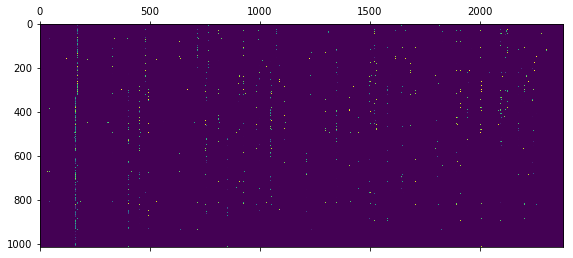

In [202]:
plt.figure(figsize=(18,8))
plt.matshow(X)

In [203]:
len(disciplinas)

297

In [204]:
print('numero alunos', Y.shape[0])
print('numero alunos aprovados', np.sum(Y))

numero alunos 1014
numero alunos aprovados 86


In [205]:
from sklearn.decomposition import pca

pca = PCA(n_components=200)
pca.fit(X)

print(pca.explained_variance_ratio_)  

[ 0.0963192   0.0753412   0.03617011  0.02537599  0.02254868  0.01968442
  0.01735872  0.01588455  0.01469931  0.01385638  0.01315516  0.01238268
  0.01219334  0.01101047  0.01035537  0.01005407  0.00977883  0.00946184
  0.00917269  0.00871871  0.00862761  0.00830555  0.00824557  0.00782523
  0.00776734  0.00763966  0.00757712  0.00741991  0.00703544  0.00696018
  0.00680113  0.00668558  0.00640291  0.006277    0.00617695  0.00585163
  0.00584531  0.00580087  0.00571966  0.0055579   0.00552483  0.00541046
  0.00524975  0.00516457  0.00503123  0.00500854  0.00485843  0.00481276
  0.00469809  0.00462162  0.00459658  0.004426    0.00430448  0.00423344
  0.00419008  0.00417947  0.00410846  0.00408817  0.00403105  0.00400998
  0.00388978  0.0038346   0.0037946   0.00368868  0.00363957  0.00362037
  0.00356917  0.0035487   0.00350802  0.00342011  0.00335782  0.00331982
  0.00330322  0.00321043  0.00317696  0.00313238  0.00306786  0.00305128
  0.00300401  0.00296274  0.00291226  0.00290077  0

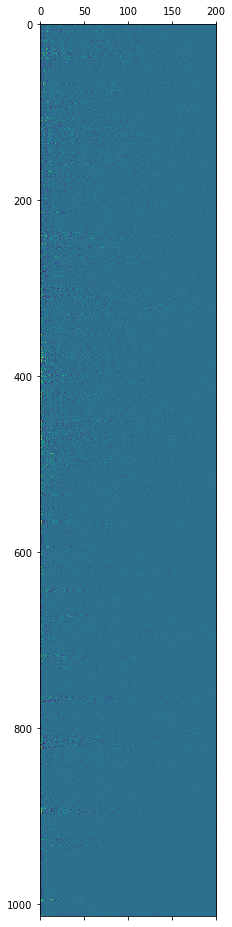

In [206]:
X = pca.transform(X)

plt.figure(figsize=(18,8))
plt.matshow(X)

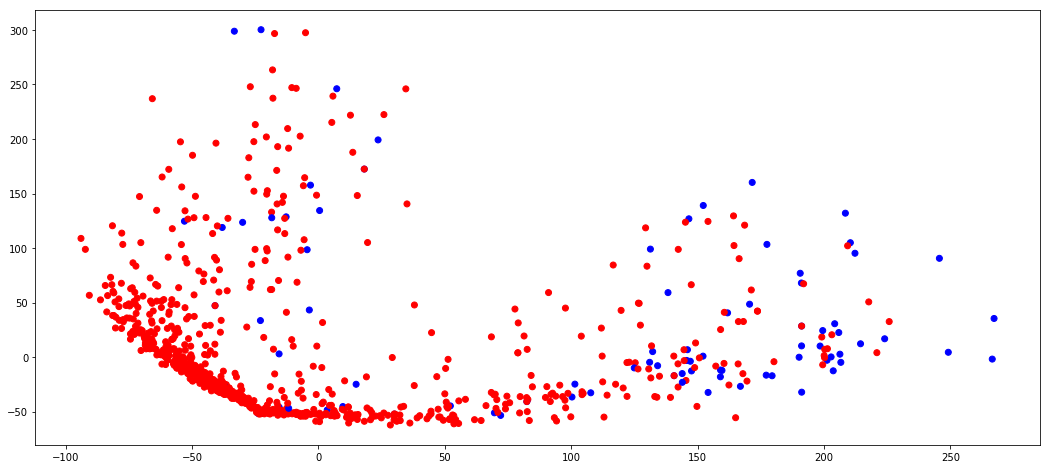

In [207]:
plt.figure(figsize=(18,8))
plt.scatter(X[:,0],X[:,1], c=Y,cmap=cm_bright)

In [208]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [209]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "Gaussian Process", "Decision Tree", 
         "Random Forest", "Neural Net", "RBF SVM", "AdaBoost", "Naive Bayes", "QDA"]

classifiers = [
                KNeighborsClassifier(10),
                SVC(kernel="linear", C=0.025),
                SVC(gamma=2, C=1),
                GaussianProcessClassifier(1.0 * RBF(1.0)),
                DecisionTreeClassifier(max_depth=5),
                RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
                MLPClassifier(alpha=1),
                AdaBoostClassifier(),
                GaussianNB(),
                QuadraticDiscriminantAnalysis()
             ]

In [210]:
X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.1, random_state=42)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(912, 200)
(912,)
(102, 200)
(102,)


# Temos que balancear as classes (copiar amostras 1 10 vezes no dado)

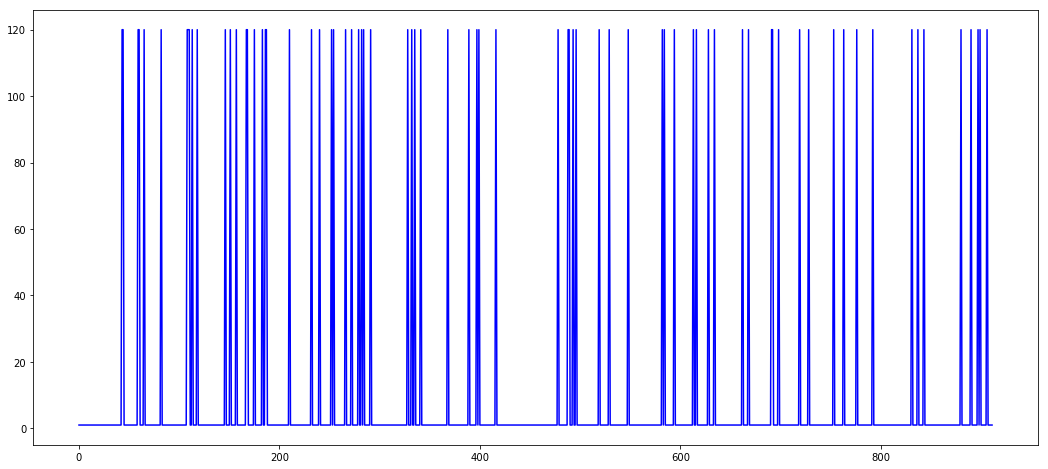

In [211]:
# iterate over classifiers
    
sample_weight = np.array(Y_train)
sample_weight[sample_weight==1]=120
sample_weight[sample_weight==0]=1

plt.figure(figsize=(18,8))
plt.plot(sample_weight, 'b-');

In [212]:
# Implementação de Classificador pelo Alex
#classifiers[6].fit(X_train, Y_train)
#score = classifiers[6].score(X_test, Y_test, sample_weight=sample_weight)

#Implementação de Classificador pelo Gustavo
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
print('\n=================================================================================')
print('CLASSIFICADOR: ' +str(clf.fit(X_train, Y_train)))
print('\n=================================================================================')
print('SCORE DO CLASSIFICADOR: '+str(clf.score(X_test, Y_test)))
print('\n=================================================================================')


CLASSIFICADOR: MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

SCORE DO CLASSIFICADOR: 0.833333333333



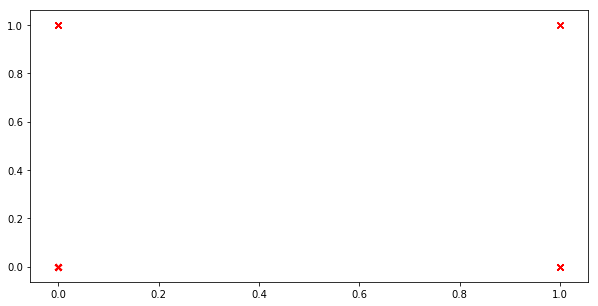

In [214]:
#yhat = classifiers[0].predict(X_test)
#plt.scatter(Y_test,yhat)

YHAT = clf.predict(X_test)

plt.figure(figsize=(10,5))
plt.scatter(Y_test, YHAT, c='r', marker='x')


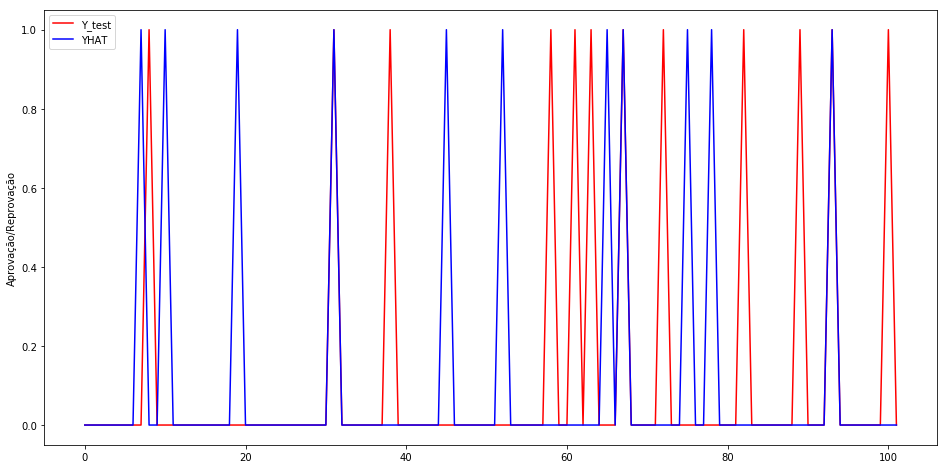

In [221]:
plt.figure(figsize=(16,8))
plt.plot(Y_test, 'r-', label='Y_test')
plt.plot(YHAT, 'b-', label='YHAT')
plt.ylabel('Aprovação/Reprovação')
plt.legend(loc=2);

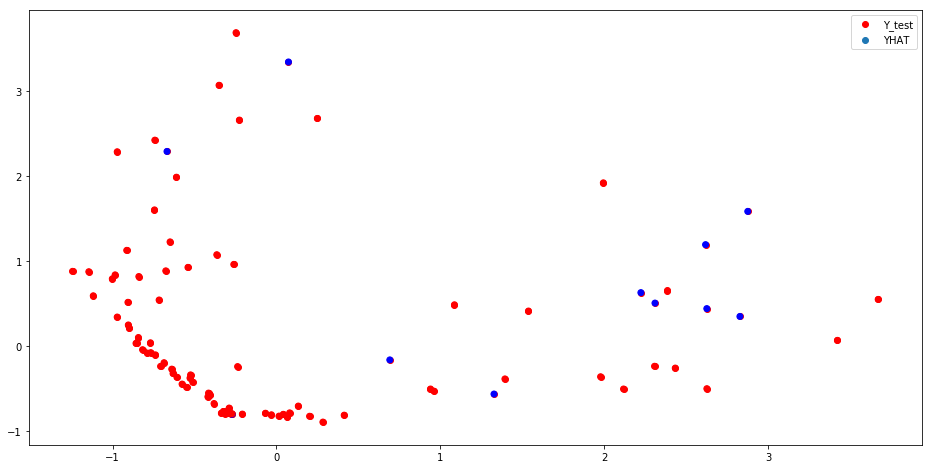

In [241]:
#plt.scatter(X_test[:,0],X_test[:,1], c=Y_test, cmap=cm_bright)
#plt.scatter(X_test[:,0],X_test[:,1], s=5, c=YHAT.ravel(), cmap=cm_bright)

plt.figure(figsize=(16,8))
plt.scatter(X_test[:,0],X_test[:,1], c='r', cmap=cm_bright, label='Y_test')
plt.scatter(X_test[:,0],X_test[:,1], c=YHAT.ravel(), cmap=cm_bright, label='YHAT')
plt.legend(loc=1);